## Find distinguishing properties of modalities

In [1]:
%load_ext autoreload
%autoreload 2

import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned'

import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_binned', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:55: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2015-12-08 06:47:01	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_binned/datapackage.json
2015-12-08 06:47:01	Parsing datapackage to create a Study object
2015-12-08 06:47:58	Initializing Study
2015-12-08 06:47:58	Initializing Predictor configuration manager for Study
2015-12-08 06:47:58	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-12-08 06:47:58	Added ExtraTreesClassifier to default predictors
2015-12-08 06:47:58	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-12-08 06:47:58	Added ExtraTreesRegressor to default predictors
2015-12-08 06:47:58	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-12-08 06:47:58	Added GradientBoostingClassifier to default predictors
2015-12-08 06:47:58	Predictor GradientBoostingRegressor is of type <class 'sklearn.en

In [2]:
study.supplemental.modalities_tidy.head()

phenotype                                         event_name modality
0        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1
1        MN  exon:chr10:102286732-102286831:-@exon:chr10:10...       ~1
2        MN  exon:chr10:103348089-103348157:+@exon:chr10:10...       ~1
3        MN  exon:chr10:103360960-103361093:+@exon:chr10:10...       ~0
4        MN  exon:chr10:103360960-103361093:+@exon:chr10:10...       ~1

In [3]:
splicing_singles_no_outliers = study.splicing.singles.ix[not_outliers]


In [4]:
splicing_feature_data = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/splicing_feature_data.csv', 
                                          index_col=0)
print splicing_feature_data.shape
splicing_feature_data.head()

(33407, 26)


/home/obotvinnik/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


criteria  \
event_id                                                       
exon:chr10:101419263-101419345:+@exon:chr10:101...  only one   
exon:chr10:101421203-101421385:+@exon:chr10:101...  only one   
exon:chr10:101507014-101507147:+@exon:chr10:101...      best   
exon:chr10:101507014-101507147:+@exon:chr10:101...      best   
exon:chr10:102114184-102114389:+@exon:chr10:102...  only one   

                                                   criteria_additional  \
event_id                                                                 
exon:chr10:101419263-101419345:+@exon:chr10:101...                 NaN   
exon:chr10:101421203-101421385:+@exon:chr10:101...                 NaN   
exon:chr10:101507014-101507147:+@exon:chr10:101...    appris_principal   
exon:chr10:101507014-101507147:+@exon:chr10:101...    appris_principal   
exon:chr10:102114184-102114389:+@exon:chr10:102...                 NaN   

                                                            criteria_full  \
event_id                                                                    
exon:chr10:101419263-101419345:+@exon:chr10:101...               only one   
exon:chr10:101421203-101421385:+@exon:chr10:101...               only one   
exon:chr10:101507014-101507147:+@exon:chr10:101...  best,appris_principal   
exon:chr10:101507014-101507147:+@exon:chr10:101...  best,appris_principal   
exon:chr10:102114184-102114389:+@exon:chr10:102...               only one   

                                                         ensembl_id  \
event_id                                                              
exon:chr10:101419263-101419345:+@exon:chr10:101...  ENSG00000198018   
exon:chr10:101421203-101421385:+@exon:chr10:101...  ENSG00000198018   
exon:chr10:101507014-101507147:+@exon:chr10:101...  ENSG00000119929   
exon:chr10:101507014-101507147:+@exon:chr10:101...  ENSG00000119929   
exon:chr10:102114184-102114389:+@exon:chr10:102...  ENSG00000099194   

                                                                               exon1  \
event_id                                                                               
exon:chr10:101419263-101419345:+@exon:chr10:101...  exon:chr10:101419263-101419345:+   
exon:chr10:101421203-101421385:+@exon:chr10:101...  exon:chr10:101421203-101421385:+   
exon:chr10:101507014-101507147:+@exon:chr10:101...  exon:chr10:101507014-101507147:+   
exon:chr10:101507014-101507147:+@exon:chr10:101...  exon:chr10:101507014-101507147:+   
exon:chr10:102114184-102114389:+@exon:chr10:102...  exon:chr10:102114184-102114389:+   

                                                    exon1_length  \
event_id                                                           
exon:chr10:101419263-101419345:+@exon:chr10:101...            83   
exon:chr10:101421203-101421385:+@exon:chr10:101...           183   
exon:chr10:101507014-101507147:+@exon:chr10:101...           134   
exon:chr10:101507014-101507147:+@exon:chr10:101...           134   
exon:chr10:102114184-102114389:+@exon:chr10:102...           206   

                                                                               exon2  \
event_id                                                                               
exon:chr10:101419263-101419345:+@exon:chr10:101...  exon:chr10:101419619-101419721:+   
exon:chr10:101421203-101421385:+@exon:chr10:101...  exon:chr10:101439018-101439223:+   
exon:chr10:101507014-101507147:+@exon:chr10:101...  exon:chr10:101510126-101510153:+   
exon:chr10:101507014-101507147:+@exon:chr10:101...  exon:chr10:101514286-101514391:+   
exon:chr10:102114184-102114389:+@exon:chr10:102...  exon:chr10:102116289-102116521:+   

                                                    exon2_length  \
event_id                                                           
exon:chr10:101419263-101419345:+@exon:chr10:101...           103   
exon:chr10:101421203-101421385:+@exon:chr10:101...           206   
exon:chr10:101507014-101507147:+@exon:chr10:101...            2

In [5]:
join_cols = splicing_feature_data.columns.difference(study.splicing.feature_data.columns)
study.splicing.feature_data = study.splicing.feature_data.join(splicing_feature_data[join_cols])

In [6]:
join_cols = study.expression.feature_data.columns.difference(splicing_feature_data.columns)

study.splicing.feature_data = splicing_feature_data.join(study.expression.feature_data[join_cols], on='one_ensembl_id')
study.splicing.feature_data.head()

criteria  \
event_id                                                       
exon:chr10:101419263-101419345:+@exon:chr10:101...  only one   
exon:chr10:101421203-101421385:+@exon:chr10:101...  only one   
exon:chr10:101507014-101507147:+@exon:chr10:101...      best   
exon:chr10:101507014-101507147:+@exon:chr10:101...      best   
exon:chr10:102114184-102114389:+@exon:chr10:102...  only one   

                                                   criteria_additional  \
event_id                                                                 
exon:chr10:101419263-101419345:+@exon:chr10:101...                 NaN   
exon:chr10:101421203-101421385:+@exon:chr10:101...                 NaN   
exon:chr10:101507014-101507147:+@exon:chr10:101...    appris_principal   
exon:chr10:101507014-101507147:+@exon:chr10:101...    appris_principal   
exon:chr10:102114184-102114389:+@exon:chr10:102...                 NaN   

                                                            criteria_full  \
event_id                                                                    
exon:chr10:101419263-101419345:+@exon:chr10:101...               only one   
exon:chr10:101421203-101421385:+@exon:chr10:101...               only one   
exon:chr10:101507014-101507147:+@exon:chr10:101...  best,appris_principal   
exon:chr10:101507014-101507147:+@exon:chr10:101...  best,appris_principal   
exon:chr10:102114184-102114389:+@exon:chr10:102...               only one   

                                                         ensembl_id  \
event_id                                                              
exon:chr10:101419263-101419345:+@exon:chr10:101...  ENSG00000198018   
exon:chr10:101421203-101421385:+@exon:chr10:101...  ENSG00000198018   
exon:chr10:101507014-101507147:+@exon:chr10:101...  ENSG00000119929   
exon:chr10:101507014-101507147:+@exon:chr10:101...  ENSG00000119929   
exon:chr10:102114184-102114389:+@exon:chr10:102...  ENSG00000099194   

                                                                               exon1  \
event_id                                                                               
exon:chr10:101419263-101419345:+@exon:chr10:101...  exon:chr10:101419263-101419345:+   
exon:chr10:101421203-101421385:+@exon:chr10:101...  exon:chr10:101421203-101421385:+   
exon:chr10:101507014-101507147:+@exon:chr10:101...  exon:chr10:101507014-101507147:+   
exon:chr10:101507014-101507147:+@exon:chr10:101...  exon:chr10:101507014-101507147:+   
exon:chr10:102114184-102114389:+@exon:chr10:102...  exon:chr10:102114184-102114389:+   

                                                    exon1_length  \
event_id                                                           
exon:chr10:101419263-101419345:+@exon:chr10:101...            83   
exon:chr10:101421203-101421385:+@exon:chr10:101...           183   
exon:chr10:101507014-101507147:+@exon:chr10:101...           134   
exon:chr10:101507014-101507147:+@exon:chr10:101...           134   
exon:chr10:102114184-102114389:+@exon:chr10:102...           206   

                                                                               exon2  \
event_id                                                                               
exon:chr10:101419263-101419345:+@exon:chr10:101...  exon:chr10:101419619-101419721:+   
exon:chr10:101421203-101421385:+@exon:chr10:101...  exon:chr10:101439018-101439223:+   
exon:chr10:101507014-101507147:+@exon:chr10:101...  exon:chr10:101510126-101510153:+   
exon:chr10:101507014-101507147:+@exon:chr10:101...  exon:chr10:101514286-101514391:+   
exon:chr10:102114184-102114389:+@exon:chr10:102...  exon:chr10:102116289-102116521:+   

                                                    exon2_length  \
event_id                                                           
exon:chr10:101419263-101419345:+@exon:chr10:101...           103   
exon:chr10:101421203-101421385:+@exon:chr10:101...           206   
exon:chr10:101507014-101507147:+@exon:chr10:101...            2

In [7]:
study.save('singlecell_pnm_figure3_modalities_binned_features')

Wrote datapackage to /home/obotvinnik/flotilla_projects/singlecell_pnm_figure3_modalities_binned_features/datapackage.json


## Global features of modalities

### Random examples of modalities

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


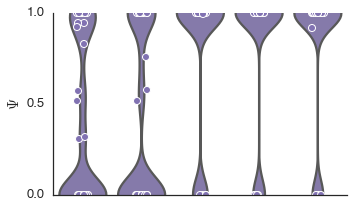

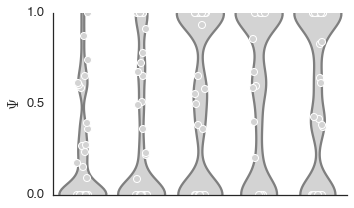

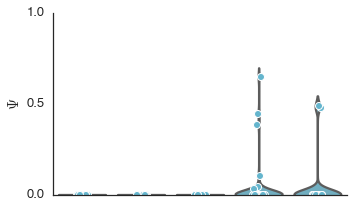

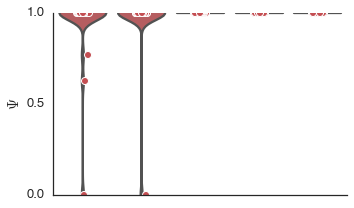

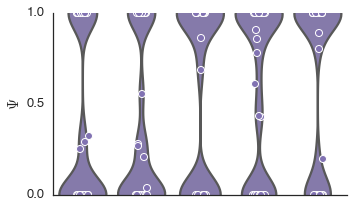

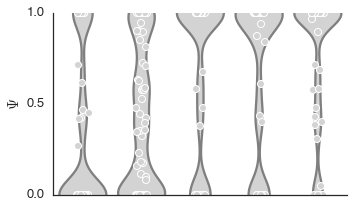

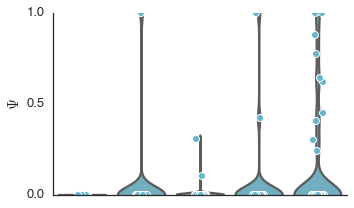

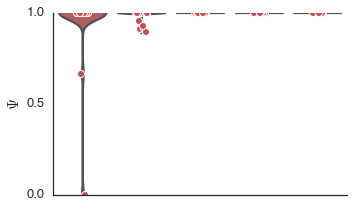

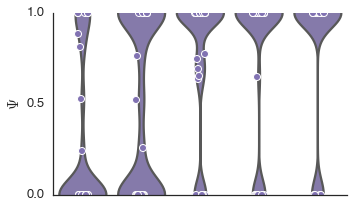

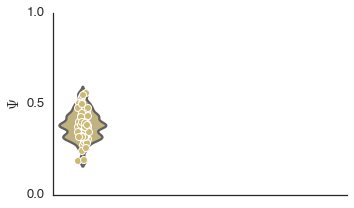

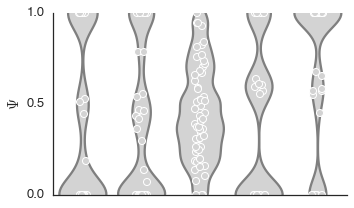

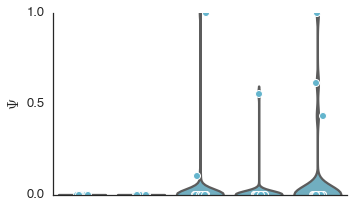

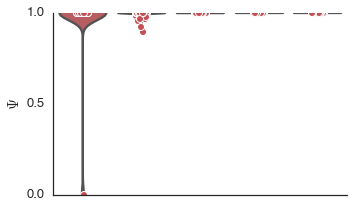

In [8]:
from modish import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE



psi_grouped = splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype)

n_violins = 5
width = n_violins * 1
height = 3

for (phenotype, modality), df in study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']):
    try:
        random_events = np.random.choice(df.event_name, size=n_violins, replace=False)
    except ValueError:
        random_events = df.event_name

#     print phenotype, modality
    psi_subset = splicing_singles_no_outliers.ix[psi_grouped.groups[phenotype], random_events]
    fig, ax = plt.subplots(figsize=(width, height))
    
    ordering_scores = psi_subset.apply(flotilla.compute.splicing.switchy_score, axis=0)
    ordering_scores.sort()
    
    psi_tidy = psi_subset.unstack().reset_index().dropna()
    psi_tidy = psi_tidy.rename(columns={'level_0': 'event_name', 0: '$\Psi$', 'level_1': 'sample_id'})

    
    color = MODALITY_TO_COLOR[modality]
    sns.violinplot(x='event_name', y='$\Psi$', data=psi_tidy, ax=ax, bw=0.2, scale='width', color=color, inner=None,
                   order=ordering_scores.index)
    sns.stripplot(x='event_name', y='$\Psi$', data=psi_tidy, ax=ax, jitter=True, color=color,
                  order=ordering_scores.index)
    if modality == 'middle':
        for x in ax.get_xticklabels():
            x = x.get_text()
    ax.set(xticklabels=['']*n_violins, yticks=[0, 0.5, 1], ylim=(0, 1), xlabel='', xlim=(-0.5, n_violins-0.5))
    sns.despine()
    fig.tight_layout()
    fig.savefig('{}/estimated_modalities_violins_{}_{}.pdf'.format(folder, modality, phenotype))

### Overlap of modalities

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:56: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")
/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:60: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


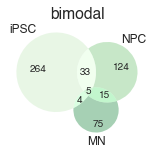

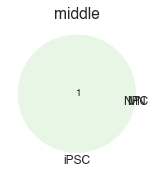

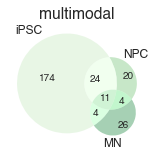

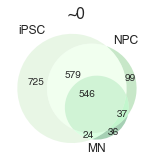

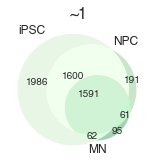

In [9]:
import matplotlib_venn

for modality, df in study.supplemental.modalities_tidy.groupby('modality'):
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    grouped = df.groupby('phenotype')
    events = [set(grouped.get_group(p).event_name) if p in grouped.groups else set([]) for p in study.phenotype_order]
    labels = study.phenotype_order
    colors = [study.phenotype_to_color[x] for x in labels]
    matplotlib_venn.venn3(events, set_labels=labels, set_colors=colors, ax=ax)
    ax.set_title(modality)
    fig.savefig('{}/modalities_venn_{}.pdf'.format(folder, modality))

## Features of modalities

### Gene features

In [29]:
splicing_feature_data = pd.read_csv(
    '/projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/splicing_feature.csv.gz', index_col=0, compression='gzip')
study.splicing.feature_data = splicing_feature_data
study.splicing.feature_data.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (11,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


criteria  \
event_id                                                       
exon:chr10:100190328-100190427:-@exon:chr10:100...      best   
exon:chr10:100193697-100193848:-@exon:chr10:100...  only one   
exon:chr10:100195392-100195529:-@exon:chr10:100...      best   
exon:chr10:101165513-101165617:-@exon:chr10:101...  only one   
exon:chr10:101419263-101419345:+@exon:chr10:101...  only one   

                                                   criteria_additional  \
event_id                                                                 
exon:chr10:100190328-100190427:-@exon:chr10:100...    appris_principal   
exon:chr10:100193697-100193848:-@exon:chr10:100...                 NaN   
exon:chr10:100195392-100195529:-@exon:chr10:100...    appris_principal   
exon:chr10:101165513-101165617:-@exon:chr10:101...                 NaN   
exon:chr10:101419263-101419345:+@exon:chr10:101...                 NaN   

                                                            criteria_full  \
event_id                                                                    
exon:chr10:100190328-100190427:-@exon:chr10:100...  best,appris_principal   
exon:chr10:100193697-100193848:-@exon:chr10:100...               only one   
exon:chr10:100195392-100195529:-@exon:chr10:100...  best,appris_principal   
exon:chr10:101165513-101165617:-@exon:chr10:101...               only one   
exon:chr10:101419263-101419345:+@exon:chr10:101...               only one   

                                                         ensembl_id  \
event_id                                                              
exon:chr10:100190328-100190427:-@exon:chr10:100...  ENSG00000107521   
exon:chr10:100193697-100193848:-@exon:chr10:100...  ENSG00000107521   
exon:chr10:100195392-100195529:-@exon:chr10:100...  ENSG00000107521   
exon:chr10:101165513-101165617:-@exon:chr10:101...  ENSG00000120053   
exon:chr10:101419263-101419345:+@exon:chr10:101...  ENSG00000198018   

                                                                               exon1  \
event_id                                                                               
exon:chr10:100190328-100190427:-@exon:chr10:100...  exon:chr10:100190328-100190427:-   
exon:chr10:100193697-100193848:-@exon:chr10:100...  exon:chr10:100193697-100193848:-   
exon:chr10:100195392-100195529:-@exon:chr10:100...  exon:chr10:100195392-100195529:-   
exon:chr10:101165513-101165617:-@exon:chr10:101...  exon:chr10:101165513-101165617:-   
exon:chr10:101419263-101419345:+@exon:chr10:101...  exon:chr10:101419263-101419345:+   

                                                    exon1_length  \
event_id                                                           
exon:chr10:100190328-100190427:-@exon:chr10:100...           100   
exon:chr10:100193697-100193848:-@exon:chr10:100...           152   
exon:chr10:100195392-100195529:-@exon:chr10:100...           138   
exon:chr10:101165513-101165617:-@exon:chr10:101...           105   
exon:chr10:101419263-101419345:+@exon:chr10:101...            83   

                                                                               exon2  \
event_id                                                                               
exon:chr10:100190328-100190427:-@exon:chr10:100...  exon:chr10:100189548-100189646:-   
exon:chr10:100193697-100193848:-@exon:chr10:100...  exon:chr10:100190888-100191048:-   
exon:chr10:100195392-100195529:-@exon:chr10:100...  exon:chr10:100195029-100195171:-   
exon:chr10:101165513-101165617:-@exon:chr10:101...  exon:chr10:101163481-101163631:-   
exon:chr10:101419263-101419345:+@exon:chr10:101...  exon:chr10:101419619-101419721:+   

                                                    exon2_length  \
event_id                                                           
exon:chr10:100190328-100190427:-@exon:chr10:100...            99   
exon:chr10:100193697-100193848:-@exon:chr10:100...           161   
exon:chr10:100195392-100195529:-@exon:chr10:100...           14

### Modality expression

In [30]:
study.splicing.feature_expression_id_col = 'ensembl_id'

In [31]:
splicing_tidy = study.tidy_splicing_with_expression.copy()
print splicing_tidy.shape
splicing_tidy.head()

(296325, 5)


event_name sample_id  psi  \
0  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_01    1   
1  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_02    1   
2  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_03    1   
3  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_04    1   
4  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_05    1   

         common_id  expression  
0  ENSG00000099194     640.592  
1  ENSG00000099194     802.000  
2  ENSG00000099194     615.645  
3  ENSG00000099194     655.721  
4  ENSG00000099194     610.570

In [32]:
singles_not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
splicing_tidy_singles = splicing_tidy.ix[splicing_tidy.sample_id.isin(singles_not_outliers)]
print splicing_tidy_singles.shape
splicing_tidy_singles.head()

(254018, 5)


event_name sample_id  psi  \
0  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_01    1   
1  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_02    1   
2  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_03    1   
3  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_04    1   
4  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_05    1   

         common_id  expression  
0  ENSG00000099194     640.592  
1  ENSG00000099194     802.000  
2  ENSG00000099194     615.645  
3  ENSG00000099194     655.721  
4  ENSG00000099194     610.570

In [33]:
splicing_tidy_singles = splicing_tidy_singles.join(study.sample_id_to_phenotype, on='sample_id')
splicing_tidy_singles.head()

event_name sample_id  psi  \
0  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_01    1   
1  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_02    1   
2  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_03    1   
3  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_04    1   
4  exon:chr10:102114184-102114389:+@exon:chr10:10...    CVN_05    1   

         common_id  expression phenotype  
0  ENSG00000099194     640.592       NPC  
1  ENSG00000099194     802.000       NPC  
2  ENSG00000099194     615.645       NPC  
3  ENSG00000099194     655.721       NPC  
4  ENSG00000099194     610.570       NPC

In [34]:
modalities_expression = study.supplemental.modalities_tidy.merge(
    splicing_tidy_singles, left_on=['event_name', 'phenotype'], right_on=['event_name', 'phenotype'])
print modalities_expression.shape
modalities_expression.head()


(193928, 7)


phenotype                                         event_name modality  \
0        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
1        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
2        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
3        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
4        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   

  sample_id  psi        common_id  expression  
0     M1_01    1  ENSG00000099194     313.077  
1     M1_02    1  ENSG00000099194     196.519  
2     M1_07    1  ENSG00000099194     191.162  
3     M1_08    1  ENSG00000099194     262.900  
4     M1_09    1  ENSG00000099194     321.496

In [35]:
modalities_expression = modalities_expression.join(modalities_expression.groupby(['event_name', 'sample_id']).expression.sum(),
                           on=['event_name', 'sample_id'], rsuffix='_summed', lsuffix='_original')

In [36]:
modalities_expression['$\log_2(TPM+1)$'] = np.log2(modalities_expression.expression_summed+1)
modalities_expression.head()

phenotype                                         event_name modality  \
0        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
1        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
2        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
3        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
4        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   

  sample_id  psi        common_id  expression_original  expression_summed  \
0     M1_01    1  ENSG00000099194              313.077            313.077   
1     M1_02    1  ENSG00000099194              196.519            196.519   
2     M1_07    1  ENSG00000099194              191.162            191.162   
3     M1_08    1  ENSG00000099194              262.900            262.900   
4     M1_09    1  ENSG00000099194              321.496            321.496   

   $\log_2(TPM+1)$  
0         8.294974  
1         7.625848  
2         7.586179  
3         8.043848  
4         8.333137

In [37]:
from modish import MODALITY_ORDER, MODALITY_PALETTE

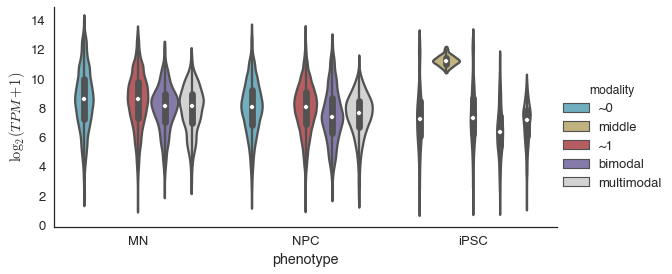

In [38]:

g = sns.factorplot(y='$\log_2(TPM+1)$', x='phenotype', hue='modality', data=modalities_expression, 
               kind='violin', aspect=2, cut=True, 
                   hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE)
g.set(ylim=(0, 15))
g.savefig('{}/modalities_expression.pdf'.format(folder))

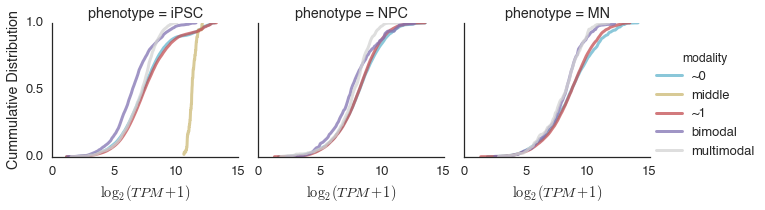

In [39]:
col = '$\log_2(TPM+1)$'
g = sns.FacetGrid(modalities_expression,  col='phenotype', hue='modality', size=3,
                   col_order=study.phenotype_order, 
                  hue_order=MODALITY_ORDER,
                  palette=MODALITY_PALETTE, 
                  legend_out=True)
g.map(flotilla.visualize.generic.cdfplot, col, log=False, alpha=0.75, linewidth=3)
g.add_legend();
g.set(ylim=(0, 1), xlim=(0, 15))
for ax in g.axes.flat:
    ax.locator_params('x', nbins=4)
    if ax.is_first_col():
        ax.locator_params('y', nbins=4)
        ax.set_ylabel('Cummulative Distribution')
g.savefig('{}/modalities_expression_cdf.pdf'.format(folder))

### Splicing features

#### Boolean features

In [40]:
sorted(study.splicing.feature_data.columns)

['bioguo_animaltfdb_chromatin_remodeler',
 'bioguo_animaltfdb_cofactor',
 'bioguo_animaltfdb_tf',
 'biomark_neural_panel',
 'cell_cycle',
 'cell_surface_markers',
 'confident_rbp',
 'criteria',
 'criteria_additional',
 'criteria_full',
 'custom_1',
 'custom_2',
 'domazetloso2008_phylostratum',
 'ensembl_id',
 'exon1',
 'exon1_length',
 'exon2',
 'exon2_divisible_by_3',
 'exon2_length',
 'exon2_merkin2012_ancient',
 'exon2_phastcons_placental_mammal',
 'exon2_splice_site_3p_score',
 'exon2_splice_site_3p_seq',
 'exon2_splice_site_5p_score',
 'exon2_splice_site_5p_seq',
 'exon3',
 'exon3_length',
 'exon4',
 'exon4_length',
 'gencode_id',
 'gene_name',
 'gene_status',
 'gene_type',
 'gerstberger2014_rbp',
 'gerstberger2014_rbp_consensus_rna_target',
 'gerstberger2014_rbp_domains[count]',
 'gerstberger2014_rbp_family_targets',
 'gerstberger2014_rbp_parologous_family_id',
 'gerstberger2014_rbp_target_diverse',
 'gerstberger2014_rbp_target_mrna',
 'gerstberger2014_rbp_target_ncrna',
 'gerstb

In [41]:
modalities_annotated = study.supplemental.modalities_tidy.join(study.splicing.feature_data, on='event_name')
modalities_annotated.head()

phenotype                                         event_name modality  \
0        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
1        MN  exon:chr10:102286732-102286831:-@exon:chr10:10...       ~1   
2        MN  exon:chr10:103348089-103348157:+@exon:chr10:10...       ~1   
3        MN  exon:chr10:103360960-103361093:+@exon:chr10:10...       ~0   
4        MN  exon:chr10:103360960-103361093:+@exon:chr10:10...       ~1   

   criteria criteria_additional          criteria_full  \
0  only one                 NaN               only one   
1      best    appris_principal  best,appris_principal   
2  only one                 NaN               only one   
3  only one                 NaN               only one   
4      best    appris_principal  best,appris_principal   

                                        ensembl_id  \
0                                  ENSG00000099194   
1  ENSG00000255339,ENSG00000075826,ENSG00000166136   
2                                  ENSG00000166171   
3                                  ENSG00000166171   
4                                  ENSG00000166171   

                              exon1  exon1_length  \
0  exon:chr10:102114184-102114389:+           206   
1  exon:chr10:102286732-102286831:-           100   
2  exon:chr10:103348089-103348157:+            69   
3  exon:chr10:103360960-103361093:+           134   
4  exon:chr10:103360960-103361093:+           134   

                              exon2   ...     isoform1_pfam_go_id  \
0  exon:chr10:102116289-102116521:+   ...                     NaN   
1  exon:chr10:102286156-102286311:-   ...                     NaN   
2  exon:chr10:103354415-103354495:+   ...                     NaN   
3  exon:chr10:103364897-103364969:+   ...                  nan[1]   
4  exon:chr10:103368592-103368694:+   ...                     NaN   

  isoform1_pfam_go_name  isoform1_pfam_name isoform2_pfam_accession  \
0                   NaN                 NaN           PF00487.19[1]   
1                   NaN                 NaN            PF05821.6[1]   
2                   NaN                 NaN            PF14913.1[1]   
3              (nan)[1]             DPCD[1]                     NaN   
4                   NaN                 NaN            PF14913.1[1]   

                         isoform2_pfam_go_id  \
0                              GO:0006629[1]   
1  GO:0003954[1],GO:0008137[1],GO:0005739[1]   
2                                     nan[1]   
3                                        NaN   
4                                     nan[1]   

                               isoform2_pfam_go_name isoform2_pfam_name  \
0                       (lipid metabolic process)[1]   FA_desaturase[1]   
1  (NADH dehydrogenase activity)[1],(NADH dehydro...         NDUF_B8[1]   
2                                           (nan)[1]            DPCD[1]   
3                                                NaN                NaN   
4                                           (nan)[1]            DPCD[1]   

                              isoform_domain_effects custom_1 custom_2  
0  No annotated reading frame --> Protein +/- domain    False    False  
1  No annotated reading frame --> Protein +/- domain     True     True  
2  No annotated reading frame --> Protein +/- domain     True     True  
3  Protein +/- domain --> No annotated reading frame     True     True  
4  No annotated reading frame --> Protein +/- domain     True     True  

[5 rows x 106 columns]

### Splice site motifs

In [49]:
from Bio import motifs

splice_site_motifs_figures = '{}/splice_site_motifs'.format(folder)
!mkdir $splice_site_motifs_figures

cols = 'exon2_splice_site_3p_seq', 'exon2_splice_site_5p_seq'

for (phenotype, modality), df in modalities_annotated.groupby(['phenotype', 'modality']):
    for col in cols:
        instances = df[col]
#         instances = instances.str.replace('T', 'U')
        splice_site_motifs = motifs.create(instances,)
        filename = '{}/{}_{}_{}.pdf'.format(splice_site_motifs_figures, col, phenotype, modality)
        splice_site_motifs.weblogo(filename, format='PDF', color_scheme='color_classic')

In [42]:
from scipy.stats import hypergeom

> The hypergeometric distribution models drawing objects from a bin. M is the total number of objects, n is total number of Type I objects. The random variate represents the number of Type I objects in N drawn without replacement from the total population.

PMF is:

```
pmf(k, M, n, N) = choose(n, k) * choose(M - n, N - k) / choose(M, N),
                               for max(0, N - (M-n)) <= k <= min(n, N)
```

Survival function

    sf(x, M, n, N, loc=0)

### Create series of lengths and event IDs for p-value enrichments

In [98]:
events = study.supplemental.modalities_tidy.groupby('phenotype').apply(lambda x: x.event_name.unique())
n_events = events_with_modality.apply(len)

events_in_modality = study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).apply(
    lambda x: x.event_name.unique())
n_events_in_modality = events_in_modality.apply(len)

In [ ]:
boolean_cols = ['ribosomal', 'ribosomal_subunit', 'gerstberger2014_tf',
        'gerstberger2014_rbp', 'gerstberger2014_rbp_target_mrna',  'gerstberger2014_rbp_target_ncrna',
        'gerstberger2014_rbp_target_ribosome', 'gerstberger2014_rbp_target_trna',
       'cell_cycle', 'cell_surface_markers', 'bioguo_animaltfdb_chromatin_remodeler', 'bioguo_animaltfdb_tf',
       'bioguo_animaltfdb_cofactor', 'exon2_merkin2012_ancient', 'exon2_divisible_by_3']

hue_order = ['~0', 'bimodal', '~1', 'multimodal']
palette = [MODALITY_TO_COLOR[m] for m in hue_order]

ncols = 5
nrows = 1
while nrows * ncols < len(boolean_cols):
    nrows += 1
width = 3.5
height = 2
figsize = ncols * width, nrows * height

heatmap_fig, heatmap_axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
axes_iter = heatmap_axes.flat

for col in boolean_cols:
    g = sns.factorplot(y=col, x='phenotype', hue='modality', data=modalities_annotated, 
                       aspect=1.5, kind='bar', size=4, hue_order=hue_order, 
                       palette=palette,
                      x_order=study.phenotype_order)
    for ax in g.axes.flat:
        ax.locator_params('y', nbins=5)
#     g.fig.tight_layout()
    g.savefig('{}/modalities_features_{}.pdf'.format(folder, col))
    
    p_values = pd.DataFrame(index=hue_order, columns=study.phenotype_order)
    for modality in hue_order:
        for phenotype in study.phenotype_order:
            M = n_events[phenotype]
            N = n_events_in_modality[phenotype, modality]
            n = study.splicing.feature_data.loc[events[phenotype], col].sum()
            x = study.splicing.feature_data.loc[events_in_modality[phenotype, modality], col].sum()

            p_values.loc[modality, phenotype] = hypergeom.sf(x, M, n, N)
    p_values = p_values.astype(float)
    
    heatmap_ax = axes_iter.next()
    plt.sca(heatmap_ax)
    sns.heatmap(-1*np.log10(p_values), annot=True, mask=p_values > 0.05, 
                cbar_kws=dict(label='$-\log_{10} p$'), ax=heatmap_ax)
    locations, labels = plt.yticks()
    plt.setp(labels, rotation=0)
    heatmap_ax.set(title=col)
heatmap_fig.tight_layout()
heatmap_fig.savefig('{}/modalities_features_boolean_p_values.pdf'.format(folder))

### Numeric features

#### Add gene expression per modality

In [76]:
study.splicing.feature_expression_id_col = 'ensembl_id'
splicing_tidy = study.tidy_splicing_with_expression.copy()
print splicing_tidy.shape
singles_not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
splicing_tidy_singles = splicing_tidy.ix[splicing_tidy.sample_id.isin(singles_not_outliers)]
print splicing_tidy_singles.shape
splicing_tidy_singles = splicing_tidy_singles.join(study.sample_id_to_phenotype, on='sample_id')


modalities_expression = modalities_annotated.merge(
    splicing_tidy_singles, left_on=['event_name', 'phenotype'], right_on=['event_name', 'phenotype'])
print modalities_expression.shape
modalities_expression = modalities_expression.join(modalities_expression.groupby(['event_name', 'sample_id']).expression.sum(),
                           on=['event_name', 'sample_id'], rsuffix='_summed', lsuffix='_original')

modalities_expression['log2(TPM+1)'] = np.log2(modalities_expression.expression_summed+1)
modalities_expression.head()

(296325, 5)
(254018, 5)
(193928, 110)


phenotype                                         event_name modality  \
0        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
1        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
2        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
3        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
4        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   

   criteria criteria_additional criteria_full       ensembl_id  \
0  only one                 NaN      only one  ENSG00000099194   
1  only one                 NaN      only one  ENSG00000099194   
2  only one                 NaN      only one  ENSG00000099194   
3  only one                 NaN      only one  ENSG00000099194   
4  only one                 NaN      only one  ENSG00000099194   

                              exon1  exon1_length  \
0  exon:chr10:102114184-102114389:+           206   
1  exon:chr10:102114184-102114389:+           206   
2  exon:chr10:102114184-102114389:+           206   
3  exon:chr10:102114184-102114389:+           206   
4  exon:chr10:102114184-102114389:+           206   

                              exon2     ...      isoform2_pfam_name  \
0  exon:chr10:102116289-102116521:+     ...        FA_desaturase[1]   
1  exon:chr10:102116289-102116521:+     ...        FA_desaturase[1]   
2  exon:chr10:102116289-102116521:+     ...        FA_desaturase[1]   
3  exon:chr10:102116289-102116521:+     ...        FA_desaturase[1]   
4  exon:chr10:102116289-102116521:+     ...        FA_desaturase[1]   

                              isoform_domain_effects  custom_1 custom_2  \
0  No annotated reading frame --> Protein +/- domain     False    False   
1  No annotated reading frame --> Protein +/- domain     False    False   
2  No annotated reading frame --> Protein +/- domain     False    False   
3  No annotated reading frame --> Protein +/- domain     False    False   
4  No annotated reading frame --> Protein +/- domain     False    False   

   sample_id psi        common_id  expression_original expression_summed  \
0      M1_01   1  ENSG00000099194              313.077           313.077   
1      M1_02   1  ENSG00000099194              196.519           196.519   
2      M1_07   1  ENSG00000099194              191.162           191.162   
3      M1_08   1  ENSG00000099194              262.900           262.900   
4      M1_09   1  ENSG00000099194              321.496           321.496   

  log2(TPM+1)  
0    8.294974  
1    7.625848  
2    7.586179  
3    8.043848  
4    8.333137  

[5 rows x 112 columns]

In [77]:
mean_expression = modalities_expression.groupby(['event_name', 'sample_id'])['expression_original'].mean()
var_expression = modalities_expression.groupby(['event_name', 'sample_id'])['expression_original'].var()

mean_expression.name = 'expression_mean'
var_expression.name = 'expression_var'



In [78]:
modalities_expression = modalities_expression.join(mean_expression, on=['event_name', 'sample_id'])

modalities_expression = modalities_expression.join(var_expression, on=['event_name', 'sample_id'])
modalities_expression.head()

phenotype                                         event_name modality  \
0        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
1        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
2        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
3        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
4        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   

   criteria criteria_additional criteria_full       ensembl_id  \
0  only one                 NaN      only one  ENSG00000099194   
1  only one                 NaN      only one  ENSG00000099194   
2  only one                 NaN      only one  ENSG00000099194   
3  only one                 NaN      only one  ENSG00000099194   
4  only one                 NaN      only one  ENSG00000099194   

                              exon1  exon1_length  \
0  exon:chr10:102114184-102114389:+           206   
1  exon:chr10:102114184-102114389:+           206   
2  exon:chr10:102114184-102114389:+           206   
3  exon:chr10:102114184-102114389:+           206   
4  exon:chr10:102114184-102114389:+           206   

                              exon2      ...        custom_1 custom_2  \
0  exon:chr10:102116289-102116521:+      ...           False    False   
1  exon:chr10:102116289-102116521:+      ...           False    False   
2  exon:chr10:102116289-102116521:+      ...           False    False   
3  exon:chr10:102116289-102116521:+      ...           False    False   
4  exon:chr10:102116289-102116521:+      ...           False    False   

   sample_id psi        common_id expression_original expression_summed  \
0      M1_01   1  ENSG00000099194             313.077           313.077   
1      M1_02   1  ENSG00000099194             196.519           196.519   
2      M1_07   1  ENSG00000099194             191.162           191.162   
3      M1_08   1  ENSG00000099194             262.900           262.900   
4      M1_09   1  ENSG00000099194             321.496           321.496   

   log2(TPM+1) expression_mean expression_var  
0     8.294974         313.077            NaN  
1     7.625848         196.519            NaN  
2     7.586179         191.162            NaN  
3     8.043848         262.900            NaN  
4     8.333137         321.496            NaN  

[5 rows x 114 columns]

In [79]:
modalities_expression_no_samples = modalities_expression.drop(['sample_id', 'psi', 'expression_original', 'log2(TPM+1)'], axis=1)
modalities_expression_no_samples = modalities_expression_no_samples.drop_duplicates()
modalities_expression_no_samples.shape

(171107, 110)

In [80]:
modalities_expression.shape

(193928, 114)

In [81]:
modalities_expression['expression_var_log2_plus1'] = np.log2(modalities_expression.expression_var+1)
modalities_expression['expression_mean_log2_plus1'] = np.log2(modalities_expression.expression_mean+1)

In [82]:
modalities_expression.head()

phenotype                                         event_name modality  \
0        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
1        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
2        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
3        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
4        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   

   criteria criteria_additional criteria_full       ensembl_id  \
0  only one                 NaN      only one  ENSG00000099194   
1  only one                 NaN      only one  ENSG00000099194   
2  only one                 NaN      only one  ENSG00000099194   
3  only one                 NaN      only one  ENSG00000099194   
4  only one                 NaN      only one  ENSG00000099194   

                              exon1  exon1_length  \
0  exon:chr10:102114184-102114389:+           206   
1  exon:chr10:102114184-102114389:+           206   
2  exon:chr10:102114184-102114389:+           206   
3  exon:chr10:102114184-102114389:+           206   
4  exon:chr10:102114184-102114389:+           206   

                              exon2            ...              sample_id psi  \
0  exon:chr10:102116289-102116521:+            ...                  M1_01   1   
1  exon:chr10:102116289-102116521:+            ...                  M1_02   1   
2  exon:chr10:102116289-102116521:+            ...                  M1_07   1   
3  exon:chr10:102116289-102116521:+            ...                  M1_08   1   
4  exon:chr10:102116289-102116521:+            ...                  M1_09   1   

         common_id expression_original  expression_summed log2(TPM+1)  \
0  ENSG00000099194             313.077            313.077    8.294974   
1  ENSG00000099194             196.519            196.519    7.625848   
2  ENSG00000099194             191.162            191.162    7.586179   
3  ENSG00000099194             262.900            262.900    8.043848   
4  ENSG00000099194             321.496            321.496    8.333137   

  expression_mean  expression_var expression_var_log2_plus1  \
0         313.077             NaN                       NaN   
1         196.519             NaN                       NaN   
2         191.162             NaN                       NaN   
3         262.900             NaN                       NaN   
4         321.496             NaN                       NaN   

  expression_mean_log2_plus1  
0                   8.294974  
1                   7.625848  
2                   7.586179  
3                   8.043848  
4                   8.333137  

[5 rows x 116 columns]

In [83]:
folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned'

ERROR! Session/line number was not unique in database. History logging moved to new session 38


IOError: [Errno 2] No such file or directory: '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned/expression/expression_var_log2_plus1_ranked_barplot.pdf'

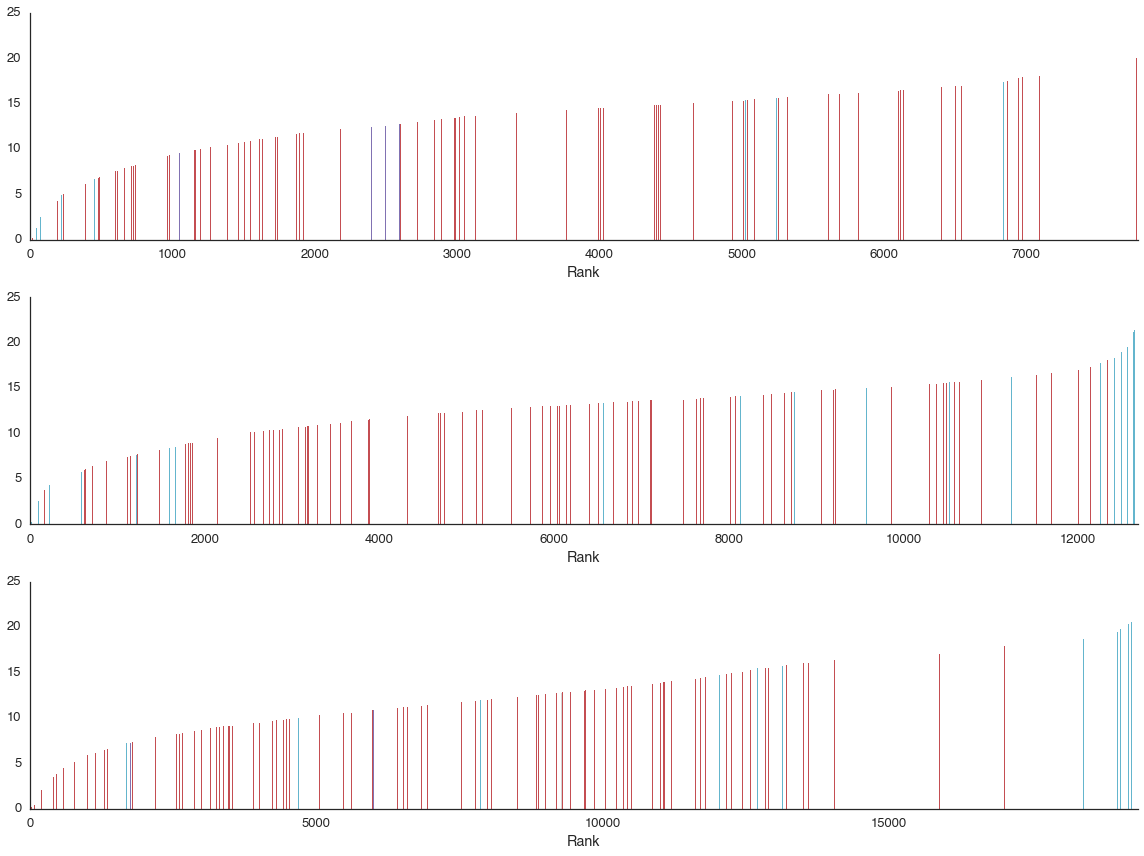

In [96]:
modalities_expression_folder = '{}/expression'.format(folder)
! mkdir $modalities_expression_folder

fig, axes = plt.subplots(figsize=(16, 12), nrows=3)

cols = 'expression_var_log2_plus1', 'expression_mean_log2_plus1'

for col in cols:
    for ax, (phenotype, phenotype_df) in zip(axes, modalities_expression.groupby('phenotype')):
        rank_col = col + '_rank'
        phenotype = phenotype_df.dropna(subset=[col])
        phenotype_df[rank_col] = phenotype_df[col].rank()
        for modality, modality_df in phenotype_df.groupby('modality'):
            x = modality_df[rank_col]
            y = modality_df[col]
            color = MODALITY_TO_COLOR[modality]
            ax.bar(x, y, color=color, linewidth=0)
        xmax = phenotype_df[rank_col].max() + 1
        ax.set(xlim=(0, xmax), xlabel='Rank')
        sns.despine()
    #     df = df.sort_values('mean diff')
    fig.tight_layout()
    fig.savefig('{}/{}_ranked_barplot.pdf'.format(modalities_expression_folder, col))

In [95]:
phenotype_df.head()

phenotype                                         event_name modality  \
92935      iPSC  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
92936      iPSC  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
92937      iPSC  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
92938      iPSC  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
92939      iPSC  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   

       criteria criteria_additional criteria_full       ensembl_id  \
92935  only one                 NaN      only one  ENSG00000099194   
92936  only one                 NaN      only one  ENSG00000099194   
92937  only one                 NaN      only one  ENSG00000099194   
92938  only one                 NaN      only one  ENSG00000099194   
92939  only one                 NaN      only one  ENSG00000099194   

                                  exon1  exon1_length  \
92935  exon:chr10:102114184-102114389:+           206   
92936  exon:chr10:102114184-102114389:+           206   
92937  exon:chr10:102114184-102114389:+           206   
92938  exon:chr10:102114184-102114389:+           206   
92939  exon:chr10:102114184-102114389:+           206   

                                  exon2              ...                psi  \
92935  exon:chr10:102116289-102116521:+              ...                  1   
92936  exon:chr10:102116289-102116521:+              ...                  1   
92937  exon:chr10:102116289-102116521:+              ...                  1   
92938  exon:chr10:102116289-102116521:+              ...                  1   
92939  exon:chr10:102116289-102116521:+              ...                  1   

             common_id  expression_original expression_summed  log2(TPM+1)  \
92935  ENSG00000099194              560.515           560.515     9.133181   
92936  ENSG00000099194              659.090           659.090     9.366519   
92937  ENSG00000099194              830.304           830.304     9.699232   
92938  ENSG00000099194              867.279           867.279     9.762015   
92939  ENSG00000099194              708.306           708.306     9.470264   

      expression_mean expression_var  expression_var_log2_plus1  \
92935         560.515            NaN                        NaN   
92936         659.090            NaN                        NaN   
92937         830.304            NaN                        NaN   
92938         867.279            NaN                        NaN   
92939         708.306            NaN                        NaN   

      expression_mean_log2_plus1 expression_var_log2_plus1_rank  
92935                   9.133181                            NaN  
92936                   9.366519                            NaN  
92937                   9.699232                            NaN  
92938                   9.762015                            NaN  
92939                   9.470264                            NaN  

[5 rows x 117 columns]

In [94]:
phenotype_df.expression_mean_log2_plus1.describe()

count    100993.000000
mean          7.094224
std           1.802126
min           1.009224
25%           5.936843
50%           7.096713
75%           8.307169
max          13.251605
Name: expression_mean_log2_plus1, dtype: float64

In [93]:
phenotype_df.expression_var_log2_plus1.describe()

count    19338.000000
mean        12.923793
std          4.141066
min          0.015709
25%         10.097240
50%         12.995226
75%         16.514774
max         21.480678
Name: expression_var_log2_plus1, dtype: float64

In [164]:
rnafold_cols = [x for x in study.splicing.feature_data if 'rnafold' in x]

In [165]:
from flotilla.visualize.generic import cdfplot

numerical_cols = [#'log2(TPM+1)', 
        'expression_var_log2_plus1', 
        'expression_mean_log2_plus1',
        'domazetloso2008_phylostratum',
        'exon1_length',
        'exon2_length',
        'exon2_splice_site_3p_score',
        'exon2_splice_site_5p_score',
        'exon2_phastcons_placental_mammal',
        'exon3_length',
        'intron_length',
        'isoform1_aromaticity',
        'isoform2_aromaticity',
        'isoform1_gravy',
        'isoform2_gravy',
        'isoform1_instability_index',
        'isoform2_instability_index',
        'isoform1_isoelectric_point',
        'isoform2_isoelectric_point',
        'isoform1_iupred_score',
        'isoform2_iupred_score',
        'isoform1_molecular_weight',
        'isoform2_molecular_weight',
        'isoform1_protein_secondary_structure_helix',
        'isoform2_protein_secondary_structure_turn',        
        'isoform1_protein_secondary_structure_sheet',
        'isoform2_protein_secondary_structure_helix',
        'isoform1_protein_secondary_structure_turn',
        'isoform2_protein_secondary_structure_sheet',
        'max_exons_per_gene',
        'isoform1_gc',
 'isoform2_gc',
 'isoform1_gc_position1',
 'isoform2_gc_position1',
 'isoform1_gc_position2',
 'isoform2_gc_position2',
 'isoform1_gc_position3',
 'isoform2_gc_position3'
    ] + rnafold_cols

iPSC	~0	bimodal	141935.0
	-0.440574541961
iPSC	~0	~1	1681576.5
	-0.589777332895
iPSC	~0	multimodal	116668.5
	-0.353535251145
iPSC	bimodal	~1	697423.0
	-0.149202790933
iPSC	bimodal	multimodal	30059.5
	0.0870392908166
iPSC	~1	multimodal	452039.5
	0.23624208175
NPC	~0	bimodal	47786.5
	-0.495964205488
NPC	~0	~1	644399.5
	-0.633225467787
NPC	~0	multimodal	18255.0
	-0.424781491195
NPC	bimodal	~1	281090.5
	-0.137261262299
NPC	bimodal	multimodal	4904.0
	0.0711827142938
NPC	~1	multimodal	99337.5
	0.208443976593
MN	~0	bimodal	10780.5
	-0.546888468933
MN	~0	~1	153039.0
	-0.653268771615
MN	~0	multimodal	4854.5
	-0.552899411519
MN	bimodal	~1	89152.0
	-0.106380302681
MN	bimodal	multimodal	2161.0
	-0.00601094258586
MN	~1	multimodal	39846.0
	0.100369360096


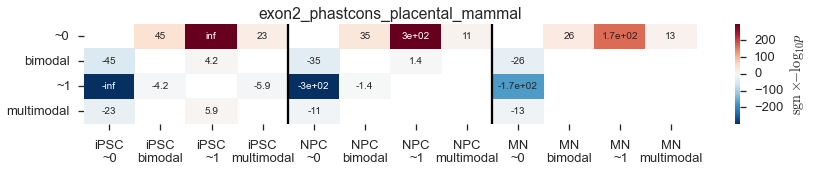

In [250]:
from scipy.stats import mannwhitneyu
import itertools

hue_order = ['~0', 'bimodal', '~1', 'multimodal']

col = 'exon2_phastcons_placental_mammal'

# fig, axes = plt.subplots(ncols=3, figsize=(3.5*3, 2), sharex=True, sharey=True)

columns = pd.MultiIndex.from_product([study.phenotype_order, hue_order])
p_values = pd.DataFrame(index=hue_order, columns=columns, dtype=float)
signs = pd.DataFrame(index=hue_order, columns=columns, dtype=float)

def set_lower_triangle(x, value):
#     print x
    x.values[np.tril_indices_from(x)] = value
    return x



for phenotype, ax in zip(study.phenotype_order, axes):
    for modality1, modality2 in itertools.combinations(hue_order, 2):
        values1 = modalities_annotated.groupby(['phenotype', 'modality'])[col].get_group((phenotype, modality1))
        values2 = modalities_annotated.groupby(['phenotype', 'modality'])[col].get_group((phenotype, modality2))
        statistic, p_value = mannwhitneyu(values1, values2, use_continuity=False)
        print '{}\t{}\t{}\t{}'.format(phenotype, modality1, modality2, statistic)#, p_value)
        sign = np.sign(values2.mean() - values1.mean())
        p_values.loc[modality1, (phenotype, modality2)] = p_value
        p_values.loc[modality2, (phenotype, modality1)] = p_value
        signs.loc[modality1, (phenotype, modality2)] = sign
        signs.loc[modality2, (phenotype, modality1)] = -sign
        print '\t', values1.mean() - values2.mean()
    
#         statistics.loc[modality2, (phenotype, modality1)] = statistic
#     sns.heatmap(np.log10(p_values), annot=True, mask=p_values > 0.05, 
#                 cbar_kws=dict(label='$\log_{10} p$'), ax=ax)
#     locations, labels = plt.yticks()
#     plt.setp(labels, rotation=0)
#     heatmap_ax.set(title=col)
# statistics
# p_values = p_values.groupby(level=0, axis=1).apply(set_lower_triangle, value=np.nan)

cmap = sns.cubehelix_palette(light=.95, as_cmap=True, reverse=True)

fig, ax = plt.subplots(figsize=(12, 2.5))
xticklabels = map(lambda x: '\n'.join(x), p_values.columns.values)

# inds = np.tril_indices_from(p_values, 1)
# p_values.values[inds] = 1
p_values_log10 = -np.log10(p_values)
vmax = p_values_log10[np.isfinite(p_values_log10)].max().max()
# p_values_log10
mask = (p_values > 0.05) | p_values.isnull()

p_values_log10 = p_values_log10 * signs

sns.heatmap(p_values_log10, xticklabels=xticklabels, annot=True, mask=mask, vmax=vmax, vmin=-vmax, 
            cbar_kws=dict(label=r'$ \mathrm{sgn} \times -\log_{10}p$'))
ymin, ymax = ax.get_ylim()
ax.vlines((len(hue_order), 2*len(hue_order)), ymin, ymax)
ax.set(title=col, xlabel='');
fig.tight_layout()

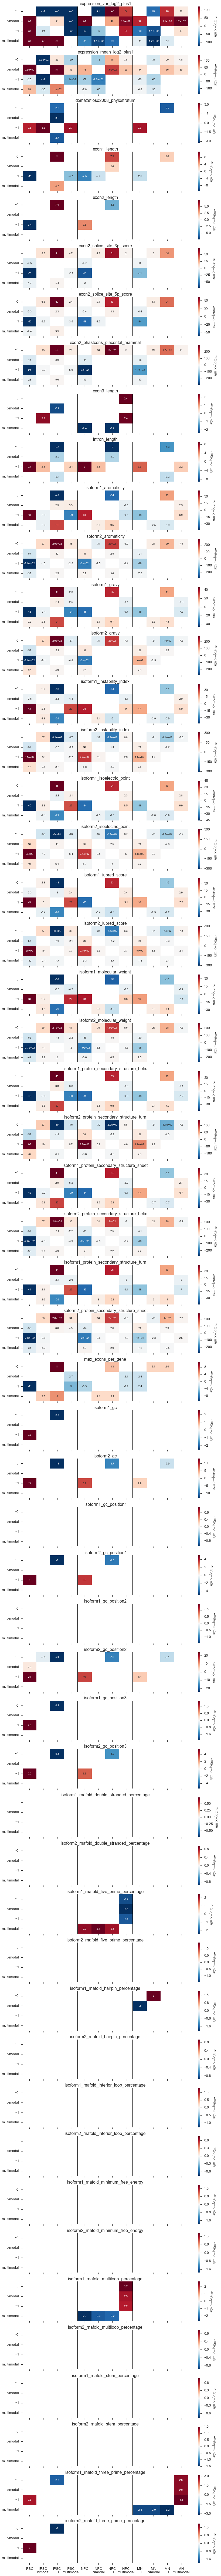

In [254]:
from scipy.stats import mannwhitneyu
import itertools
import os

#  'skipped_exon_exon2_phastcons_placental_mammal',
#  'skipped_exon_exon2_splice_site_3p_score',
#  'skipped_exon_exon2_splice_site_5p_score'])

log10_cols = ['max_exons_per_gene', 'intron_length', 
             'isoform1_molecular_weight', 'isoform2_molecular_weight', 'expression_var', 
              'exon1_length', 'exon2_length', 'exon3_length']
cdf_cols = ['domazetloso2008_phylostratum', 
             'isoform1_gc_position2',
             'isoform1_gc_position3',
             'isoform2_gc',
             'isoform2_gc_position1',
             'isoform2_gc_position2',
             'isoform2_gc_position3',
            'exon2_splice_site_3p_score', 
            'exon2_splice_site_5p_score', 
            'exon2_phastcons_placental_mammal']
log10s = True, False

plots = 'cdf', 'box'


def set_lower_triangle(x, value):
#     print x
    x.values[np.tril_indices_from(x)] = value
    return x

hue_order = ['~0', 'bimodal', '~1', 'multimodal']
palette = [MODALITY_TO_COLOR[m] for m in hue_order]

nrows = len(numerical_cols)
heatmap_fig, heatmap_axes = plt.subplots(figsize=(12, 2.5*nrows), nrows=nrows, sharex=True, sharey=True)
axes_iter = heatmap_axes.flat
cmap = sns.cubehelix_palette(light=.95, as_cmap=True, reverse=True)

for col in numerical_cols:
#     if col.startswith('isoform'):
#         # Remove all remaining strings, which are proteins which had a stop codon
#         s = modalities_expression[col]
#         s = s[~s.str.contains('\*').fillna(False)].astype(float)
#         modalities_expression[col] = s
    
    for log10 in log10s:
        for plot in plots:
            suffix = '' if not log10 else '_log10'
            pdf = '{}/modalities_features_{}_{}{}.pdf'.format(folder, col, plot, suffix)
            if os.path.exists(pdf):
                continue

            if log10 and col not in log10_cols:
                continue
            if not log10 and col in log10_cols:
                continue
            if plot == 'cdf':
                if col not in cdf_cols:
                    continue
                g = sns.FacetGrid(modalities_expression,  col='phenotype', hue='modality', size=3,
                                   col_order=study.phenotype_order, hue_order=hue_order,
                                  palette=palette, legend_out=True)
                g.map(flotilla.visualize.generic.cdfplot, col, log=log10, alpha=0.75, linewidth=2)
                g.set(ylim=(0, 1))
                if col == 'domazetloso2008_phylostratum':
                    g.set(ylim=(0.8, 1))
                for ax in g.axes.flat:
                    if ax.is_first_col():
                        ax.locator_params('y', nbins=4)
                        ax.set_ylabel('Cumulative Distribution')
            else:
                log_col = col + '_log10' if log10 else col
                if log10:
                    modalities_expression[log_col] = np.log10(modalities_expression[col]).astype(float)
                
                # Which column to plot
                plot_col = log_col if log10 else col
                g = sns.factorplot(y=log_col, x='phenotype', hue='modality', data=modalities_expression, 
                                   kind=plot, aspect=2, order=study.phenotype_order, notch=True,
                                   hue_order=hue_order, palette=palette)
            g.savefig(pdf)

    # Quantify cross-modality enrichment

    # fig, axes = plt.subplots(ncols=3, figsize=(3.5*3, 2), sharex=True, sharey=True)
    
    annotated_grouped = modalities_annotated.groupby(['phenotype', 'modality'])
    expression_grouped = modalities_expression.groupby(['phenotype', 'modality'])

    columns = pd.MultiIndex.from_product([study.phenotype_order, hue_order])
    p_values = pd.DataFrame(index=hue_order, columns=columns, dtype=float)
    signs = pd.DataFrame(index=hue_order, columns=columns, dtype=float)

    for phenotype in study.phenotype_order:
        for modality1, modality2 in itertools.combinations(hue_order, 2):
            try:
                values1 = annotated_grouped[col].get_group((phenotype, modality1))
                values2 = annotated_grouped[col].get_group((phenotype, modality2))
            except KeyError:
                values1 = expression_grouped[col].get_group((phenotype, modality1))
                values2 = expression_grouped[col].get_group((phenotype, modality2))
                
            statistic, p_value = mannwhitneyu(values1, values2, use_continuity=True)
            
            # Get two-sided p-value
            p_value *= 2
            sign = np.sign(values2.mean() - values1.mean())
            p_values.loc[modality1, (phenotype, modality2)] = p_value
            p_values.loc[modality2, (phenotype, modality1)] = p_value
            signs.loc[modality1, (phenotype, modality2)] = sign
            signs.loc[modality2, (phenotype, modality1)] = -sign

    heatmap_ax = axes_iter.next()
    plt.sca(heatmap_ax)
    xticklabels = map(lambda x: '\n'.join(x), p_values.columns.values)

    # inds = np.tril_indices_from(p_values, 1)
    # p_values.values[inds] = 1
    p_values_log10 = -np.log10(p_values)
    vmax = p_values_log10[np.isfinite(p_values_log10)].max().max()
    # p_values_log10
    mask = (p_values > 0.01) | p_values.isnull()

    p_values_log10 = p_values_log10 * signs

    sns.heatmap(p_values_log10, xticklabels=xticklabels, annot=True, mask=mask, vmax=vmax, vmin=-vmax, 
                cbar_kws=dict(label=r'$ \mathrm{sgn} \times -\log_{10}p$'), ax=heatmap_ax)
    ymin, ymax = heatmap_ax.get_ylim()
    heatmap_ax.vlines((len(hue_order), 2*len(hue_order)), ymin, ymax)
    heatmap_ax.set(title=col, xlabel='');
heatmap_fig.tight_layout()
heatmap_fig.savefig('{}/modalities_features_numeric_enrichment.pdf'.format(folder))

In [27]:
modalities_annotated.head()

phenotype                                         event_name modality  \
0        MN  exon:chr10:102114184-102114389:+@exon:chr10:10...       ~1   
1        MN  exon:chr10:102286732-102286831:-@exon:chr10:10...       ~1   
2        MN  exon:chr10:103348089-103348157:+@exon:chr10:10...       ~1   
3        MN  exon:chr10:103360960-103361093:+@exon:chr10:10...       ~0   
4        MN  exon:chr10:103360960-103361093:+@exon:chr10:10...       ~1   

   criteria criteria_additional criteria_full       ensembl_id  \
0  only one                 NaN      only one  ENSG00000099194   
1       NaN                 NaN           NaN              NaN   
2       NaN                 NaN           NaN              NaN   
3  only one                 NaN      only one  ENSG00000166171   
4       NaN                 NaN           NaN              NaN   

                              exon1  exon1_length  \
0  exon:chr10:102114184-102114389:+           206   
1                               NaN           NaN   
2                               NaN           NaN   
3  exon:chr10:103360960-103361093:+           134   
4                               NaN           NaN   

                              exon2         ...             rbp ribosomal  \
0  exon:chr10:102116289-102116521:+         ...           False     False   
1                               NaN         ...             NaN       NaN   
2                               NaN         ...             NaN       NaN   
3  exon:chr10:103364897-103364969:+         ...           False     False   
4                               NaN         ...             NaN       NaN   

   ribosomal_subunit synapse         tag      transcript_id transcript_name  \
0              False   False         NaN  ENSG00000099194.5             SCD   
1                NaN     NaN         NaN                NaN             NaN   
2                NaN     NaN         NaN                NaN             NaN   
3              False   False  ncRNA_host  ENSG00000166171.8            DPCD   
4                NaN     NaN         NaN                NaN             NaN   

   transcript_status transcript_type transcription_factor  
0              KNOWN  protein_coding                False  
1                NaN             NaN                  NaN  
2                NaN             NaN                  NaN  
3              KNOWN  protein_coding                False  
4                NaN             NaN                  NaN  

[5 rows x 63 columns]

In [46]:
isoform_cols = [x.replace('1_', '{}_') for x in modalities_annotated.columns if x.startswith('isoform1')]
isoform_cols

['isoform{}_gc',
 'isoform{}_gc_position1',
 'isoform{}_gc_position2',
 'isoform{}_gc_position3',
 'isoform{}_translation',
 'isoform{}_gravy',
 'isoform{}_isoelectric_point',
 'isoform{}_instability_index',
 'isoform{}_molecular_weight',
 'isoform{}_protein_secondary_structure_helix',
 'isoform{}_protein_secondary_structure_sheet',
 'isoform{}_protein_secondary_structure_turn',
 'isoform{}_aromaticity',
 'isoform{}_iupred_score',
 'isoform{}_pfam_accession',
 'isoform{}_pfam_go_id',
 'isoform{}_pfam_go_name',
 'isoform{}_pfam_name']

### For isoform cols, plot both isoforms

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned/isoform_features': File exists


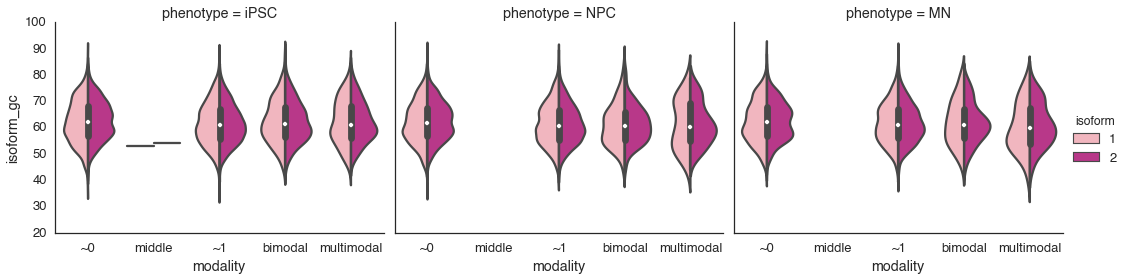

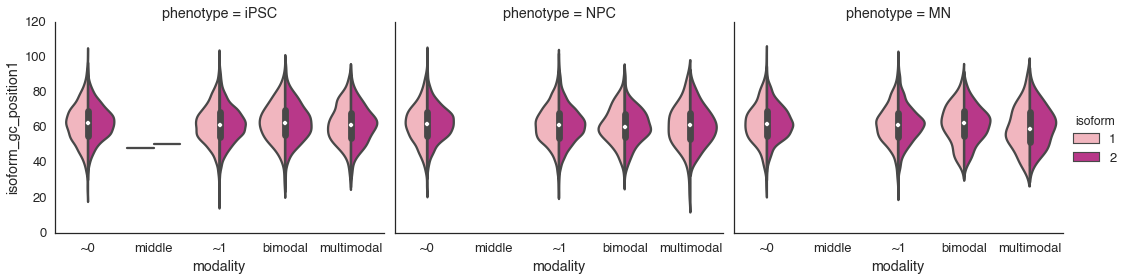

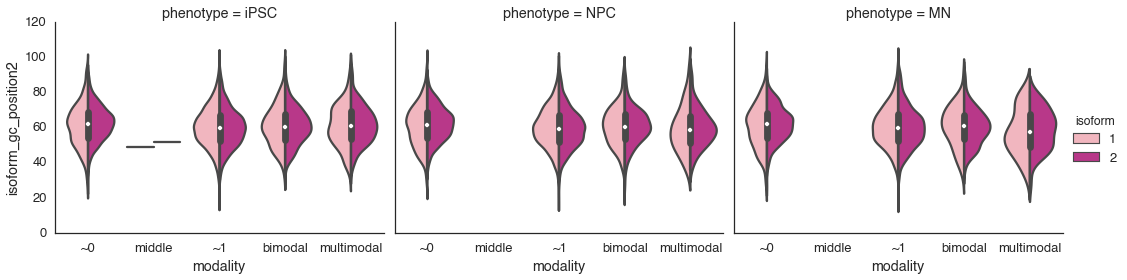

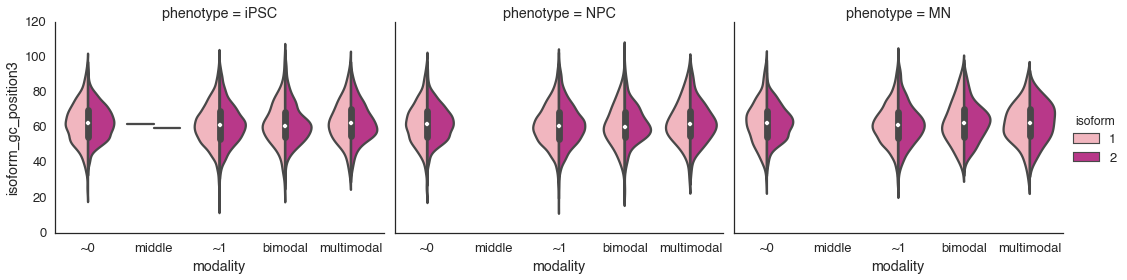

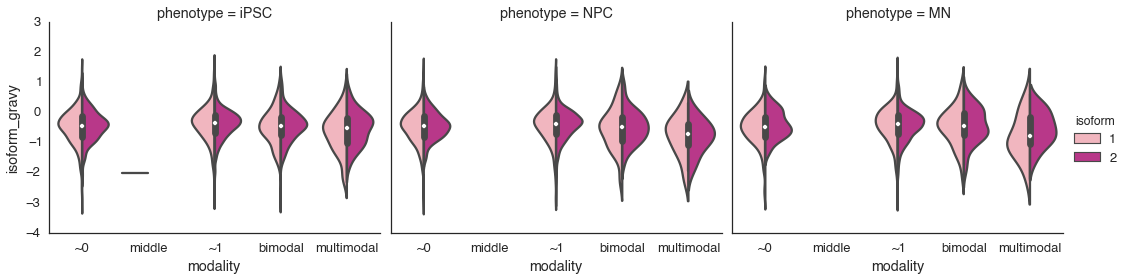

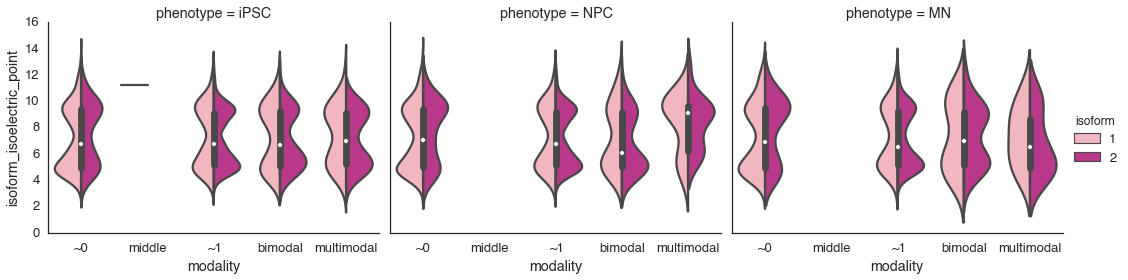

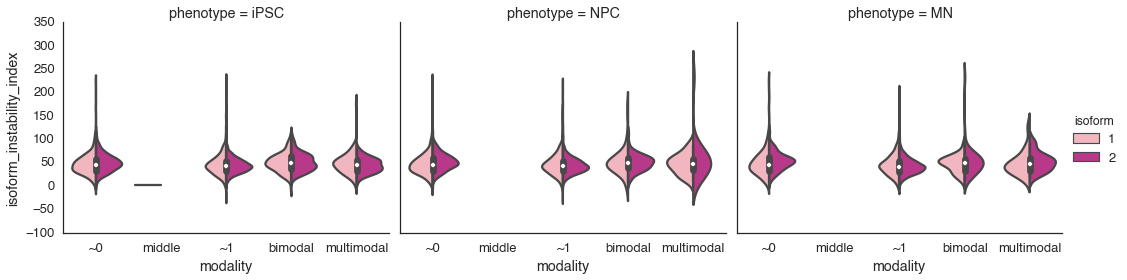

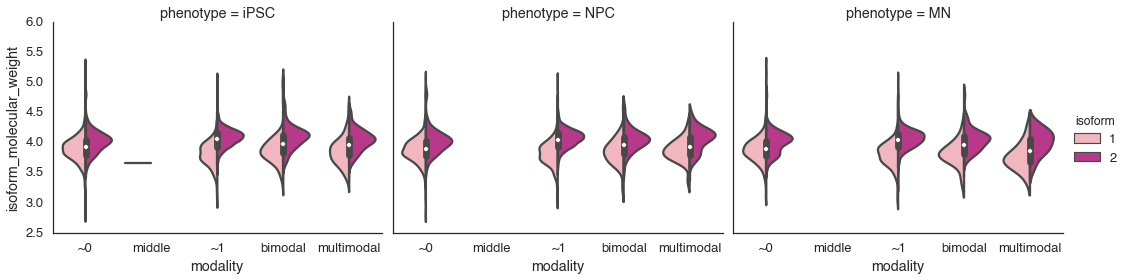

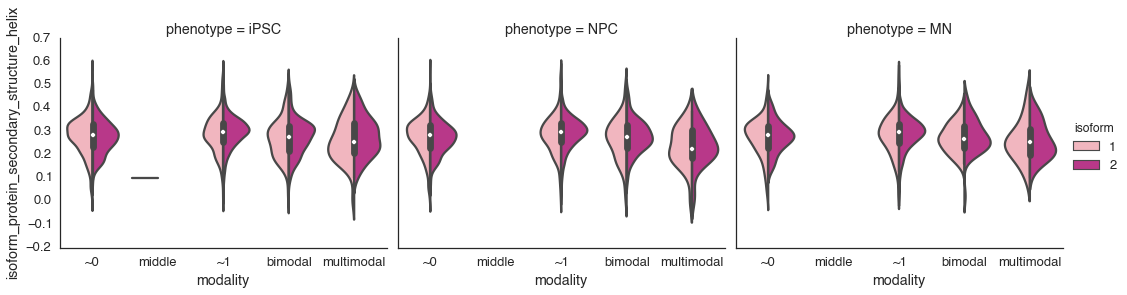

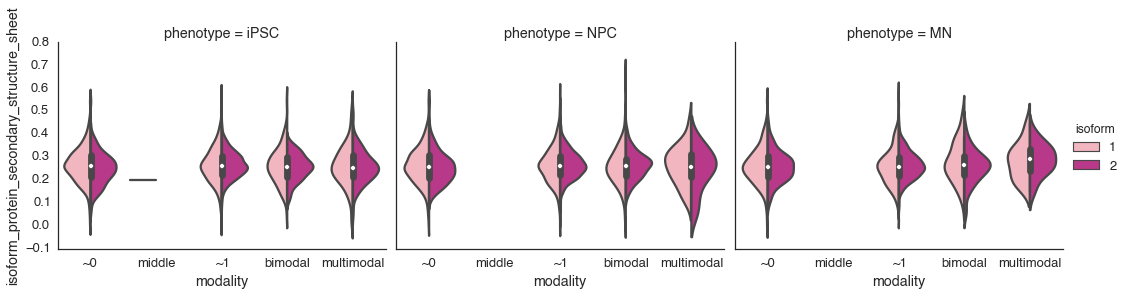

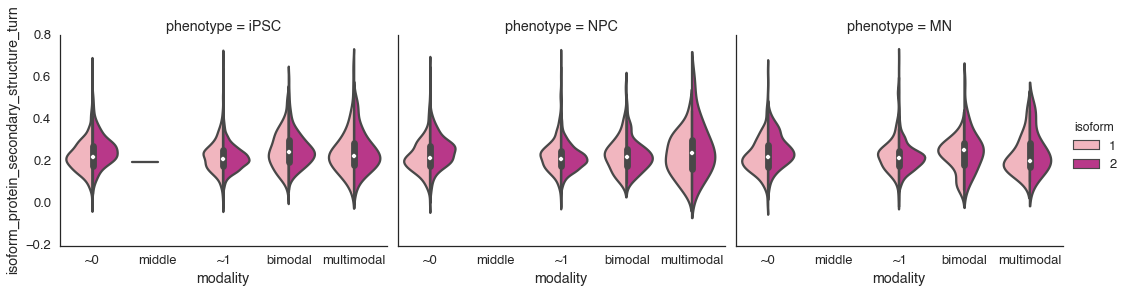

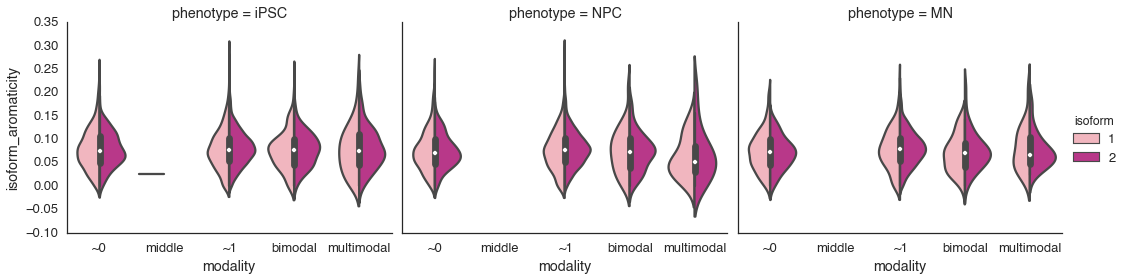

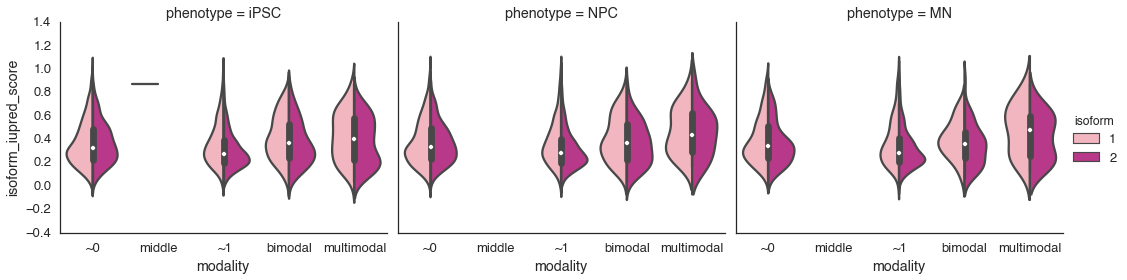

In [52]:
isoform_figure_folder = '{}/isoform_features'.format(folder)
! mkdir $isoform_figure_folder

non_numeric_cols = ['translation', 'pfam']

hue_order = '~0', 'bimodal', '~1'
palette = [MODALITY_TO_COLOR[m] for m in hue_order]

modalities_annotated_index = modalities_annotated.set_index(['phenotype', 'modality'])

for isoform_col in isoform_cols:
    if any(non_numeric in isoform_col for non_numeric in non_numeric_cols):
        continue
    
    x = isoform_col.format(1)
    y = isoform_col.format(2)
    
#     g = sns.FacetGrid(modalities_annotated, col='modality', row='phenotype', col_order=hue_order)
#     g.map(plt.hexbin, x, y, mincnt=1, gridsize=50, edgecolor=u'darkgrey')
#     g.set_titles("{col_name} {row_name}")
#     g.savefig('{}/modality_features_{}_hexbin.pdf'.format(folder, isoform_col.format('')))
    isoform1 = modalities_annotated_index[x].reset_index()
    isoform2 = modalities_annotated_index[y].reset_index()

    name = isoform_col.format('')
    isoform1 = isoform1.rename(columns={x:name})
    isoform2 = isoform2.rename(columns={y:name})

    isoform1['isoform'] = 1
    isoform2['isoform'] = 2
    df = pd.concat([isoform1, isoform2])
    if 'weight' in name:
        df[name] = np.log10(df[name])

    g = sns.factorplot(hue='isoform', x='modality', y=name, col='phenotype', data=df, order=MODALITY_ORDER,
                   split=True, kind='violin', aspect=1.25, col_order=study.phenotype_order, palette='RdPu')
    g.savefig('{}/{}.pdf'.format(isoform_figure_folder, name))

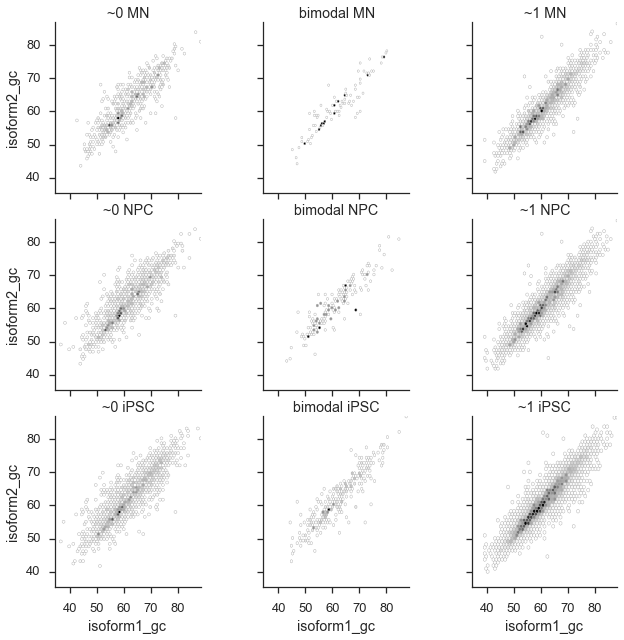

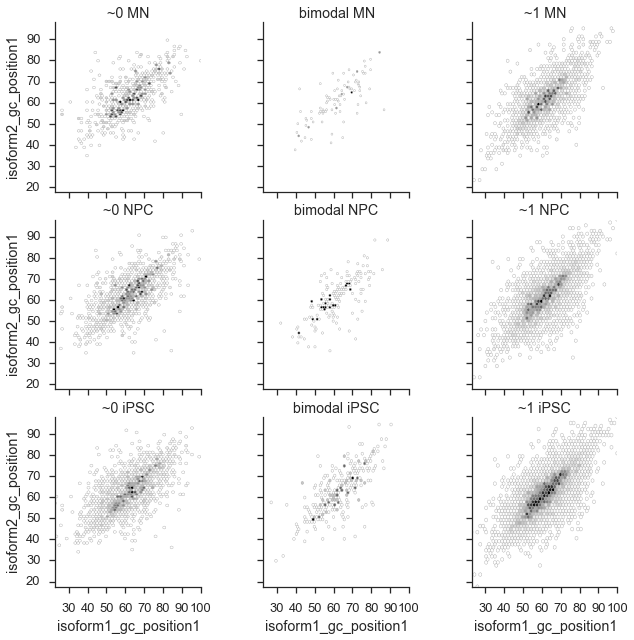

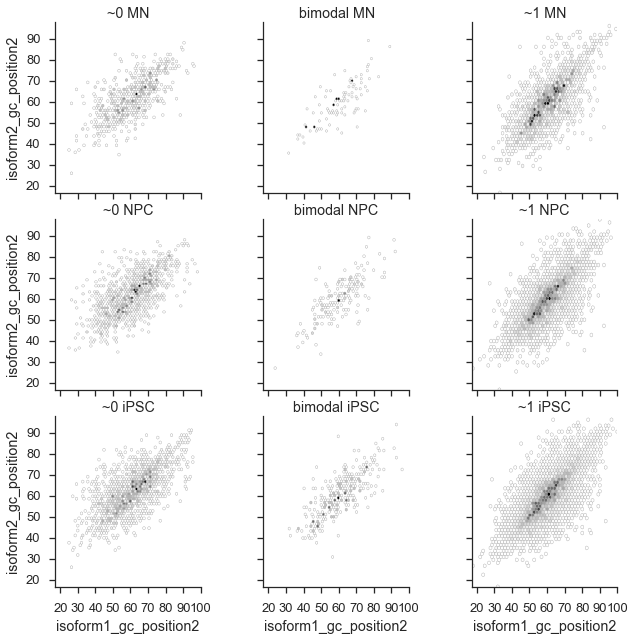

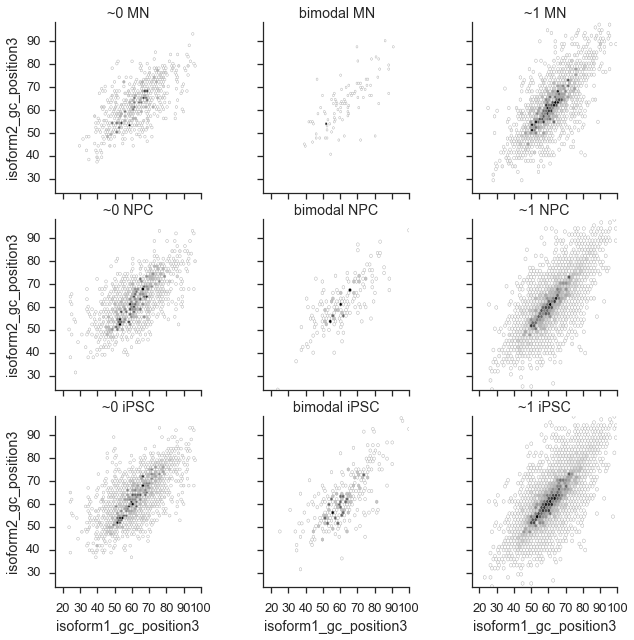

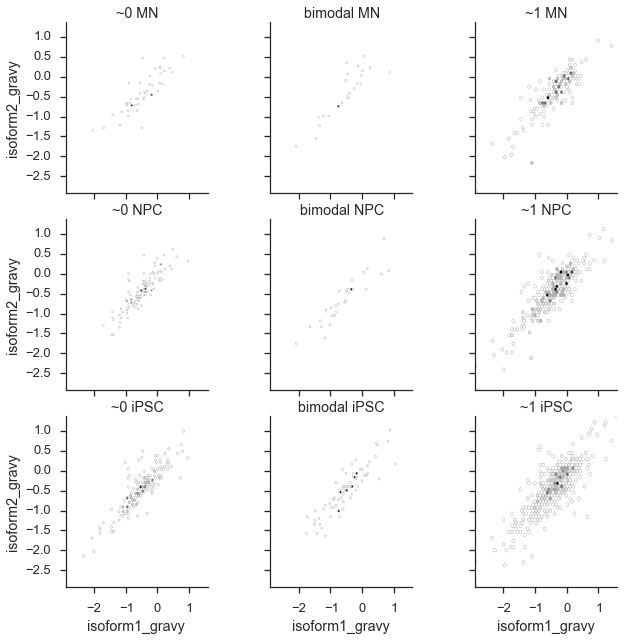

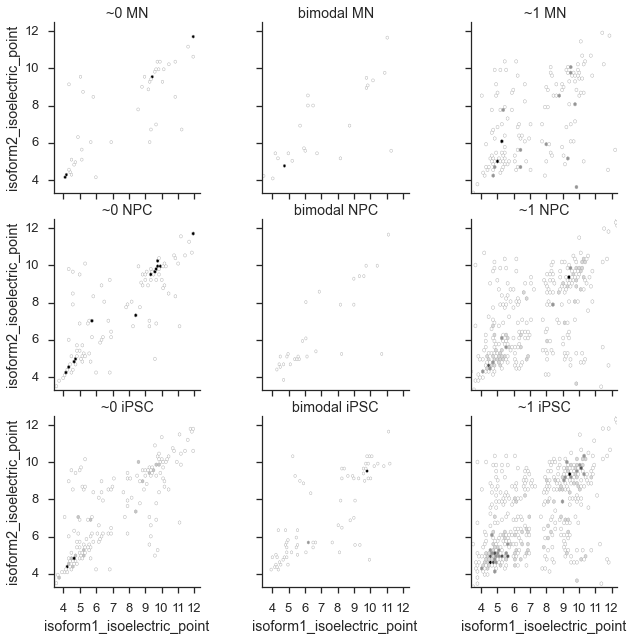

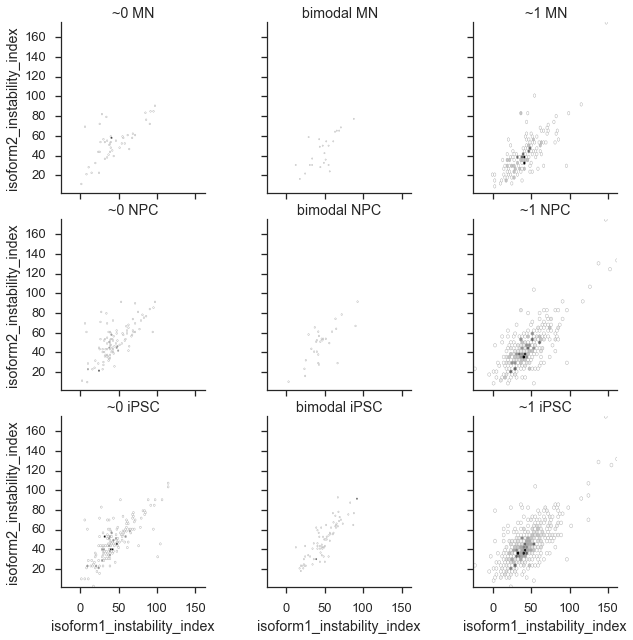

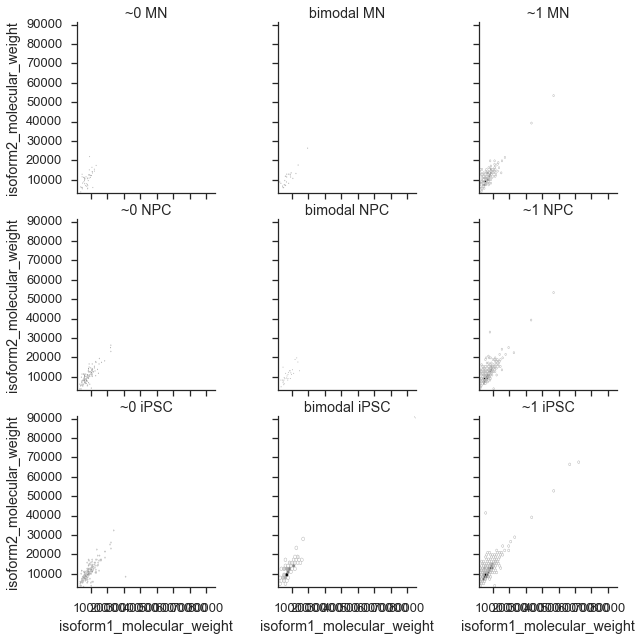

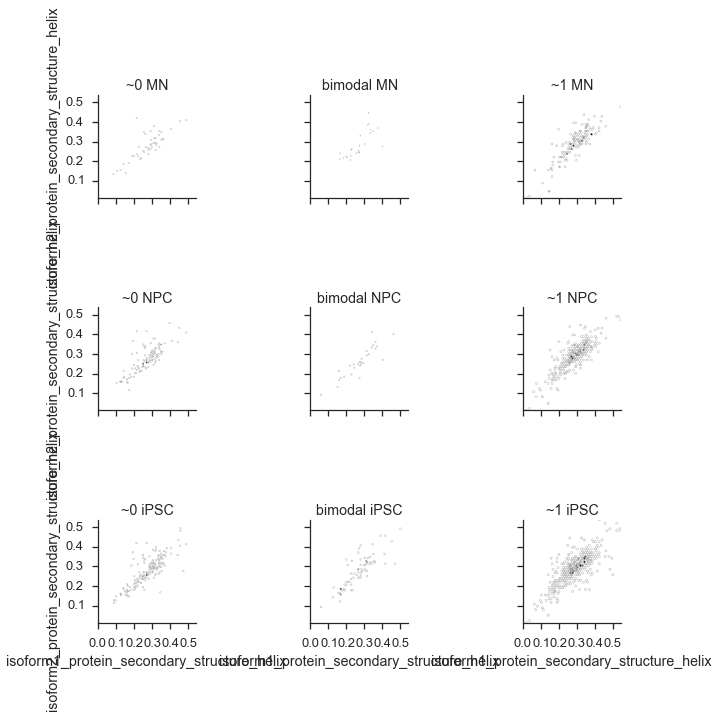

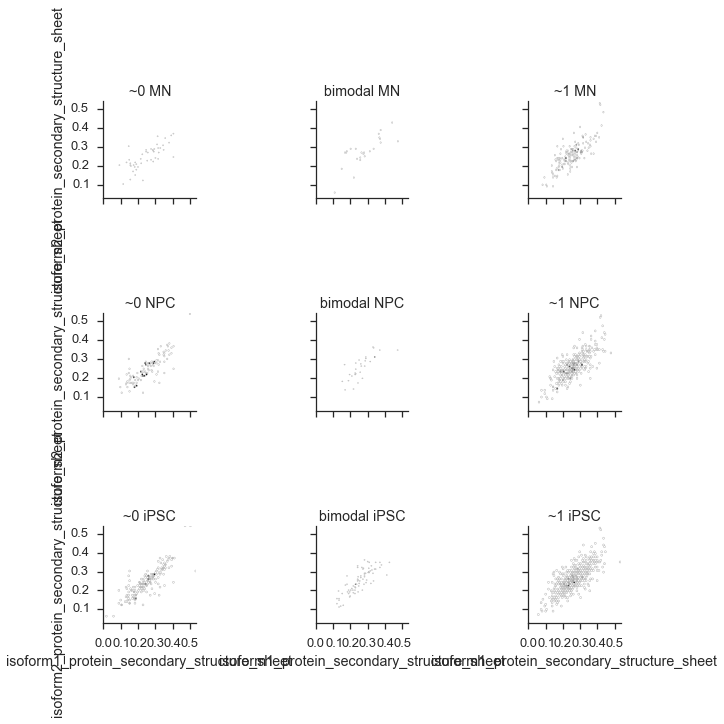

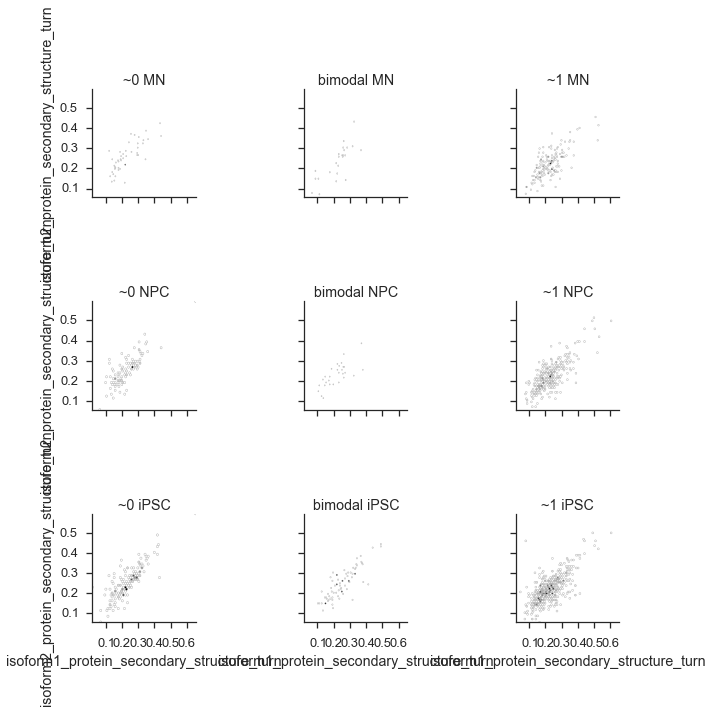

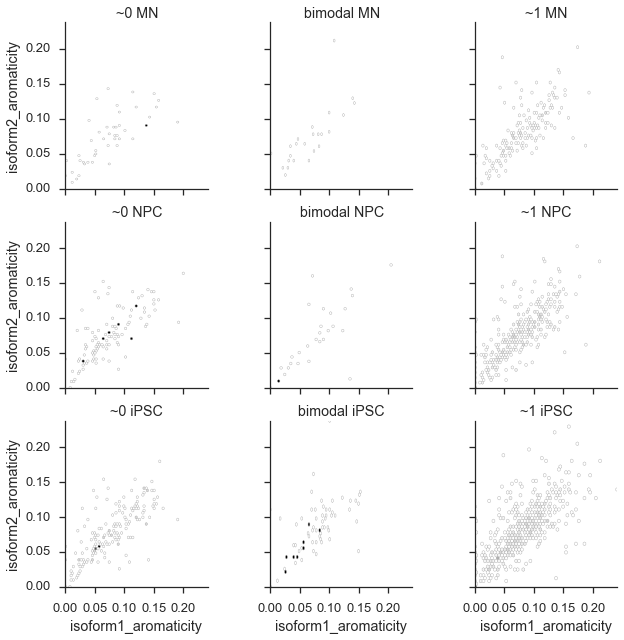

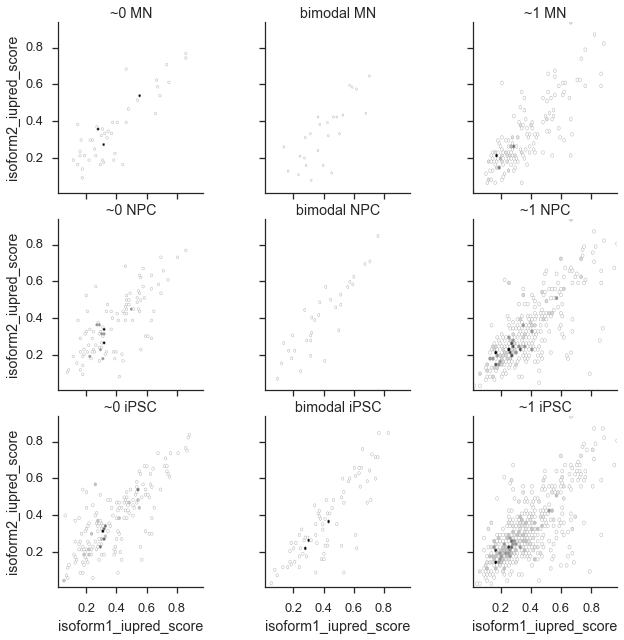

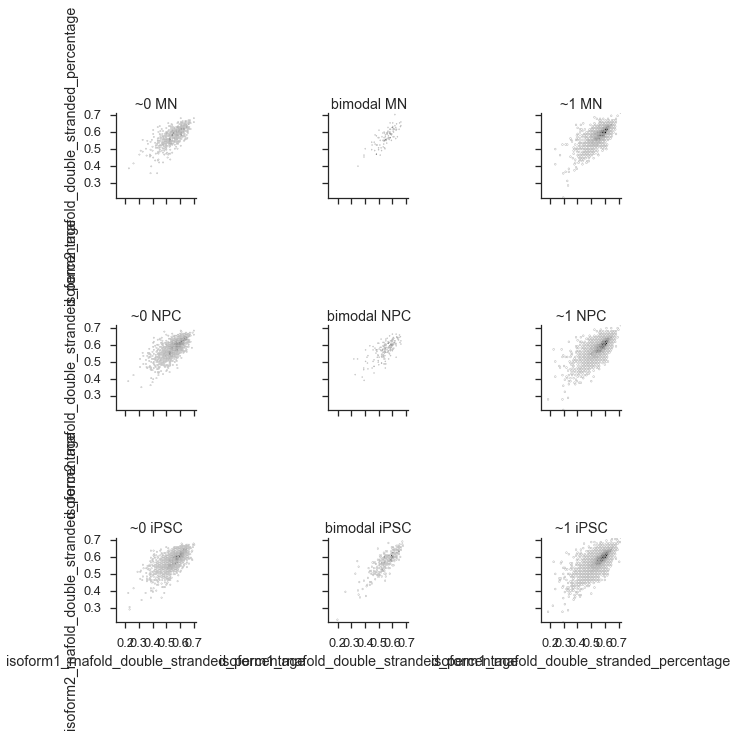

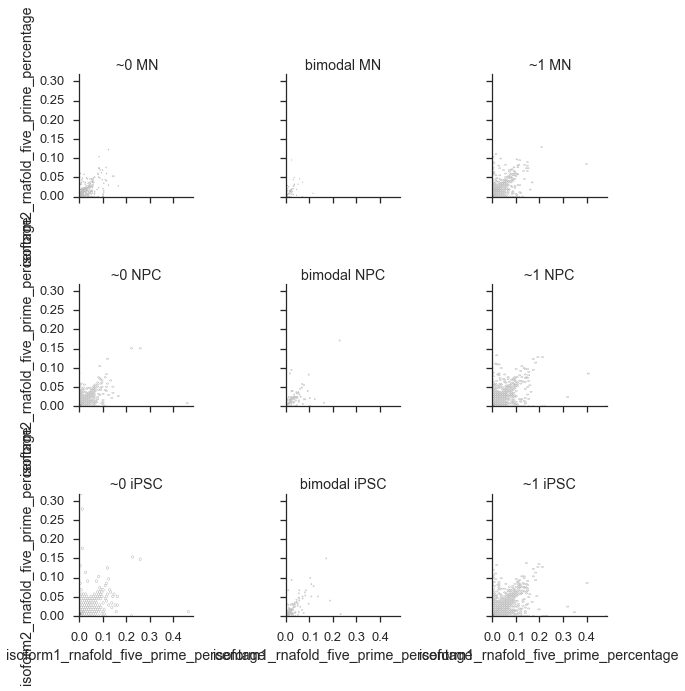

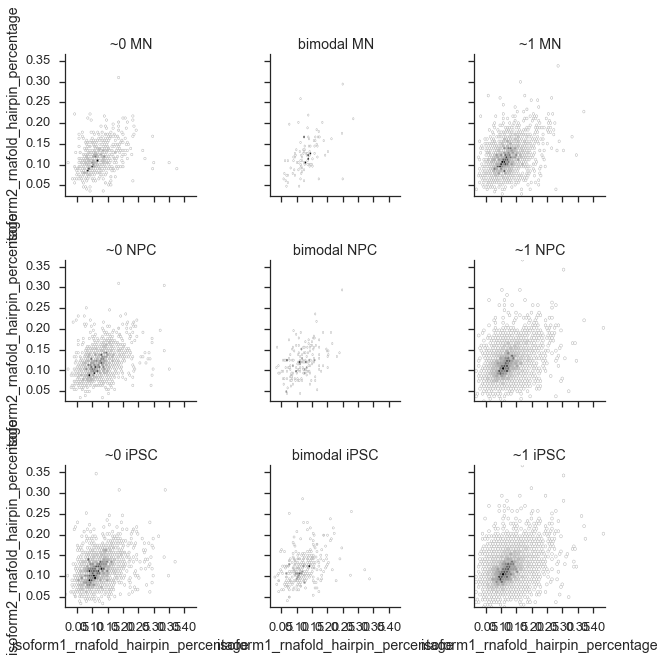

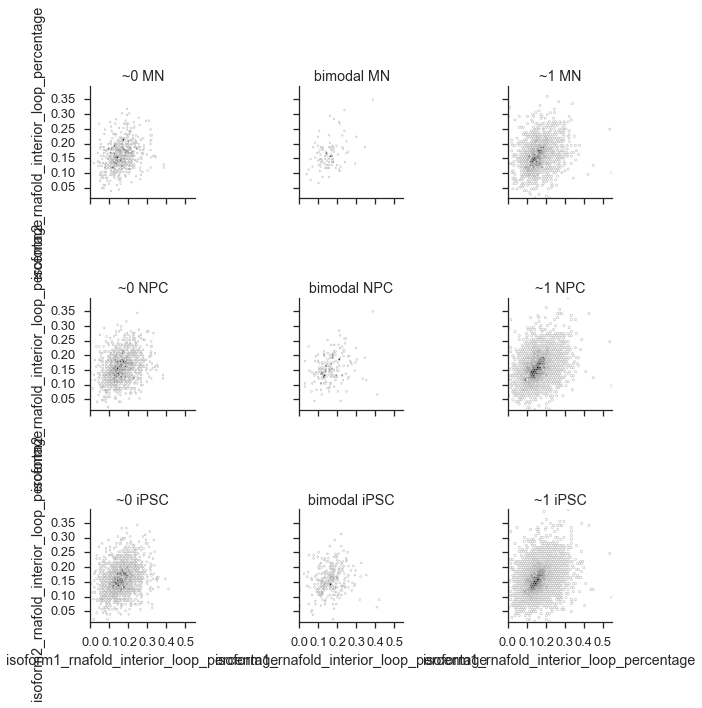

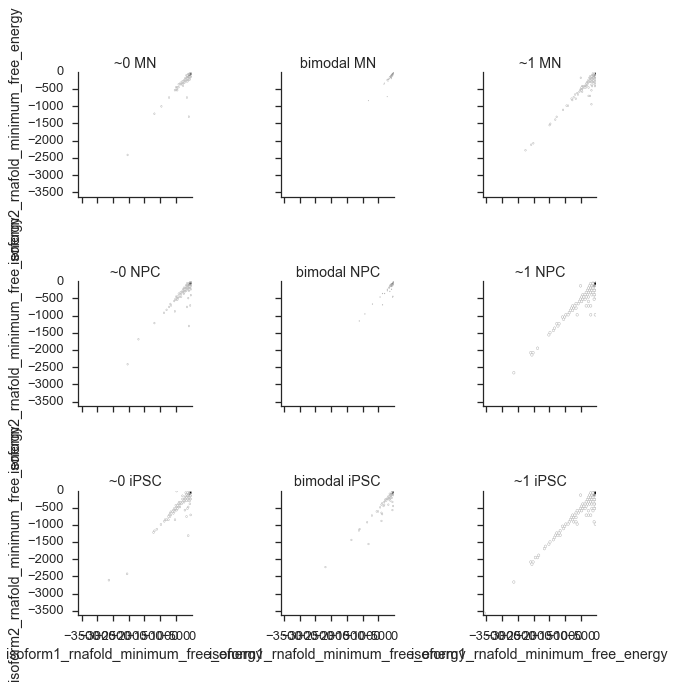

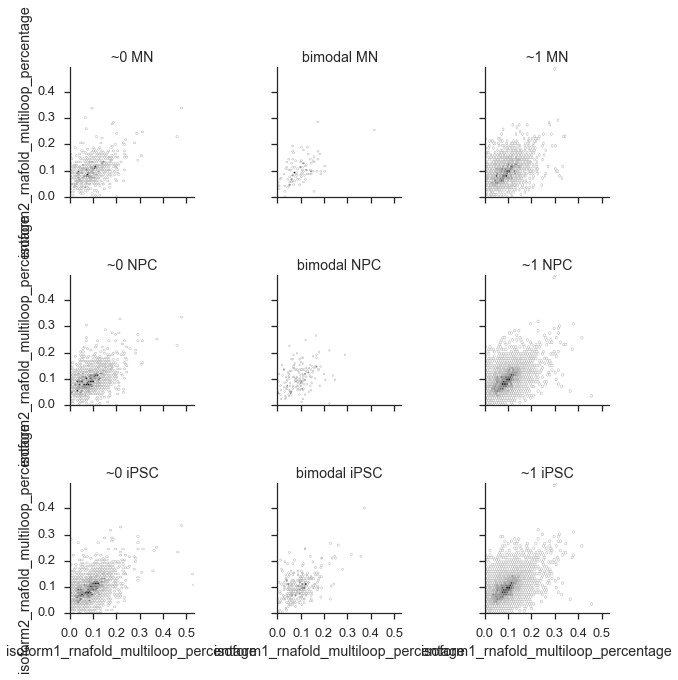

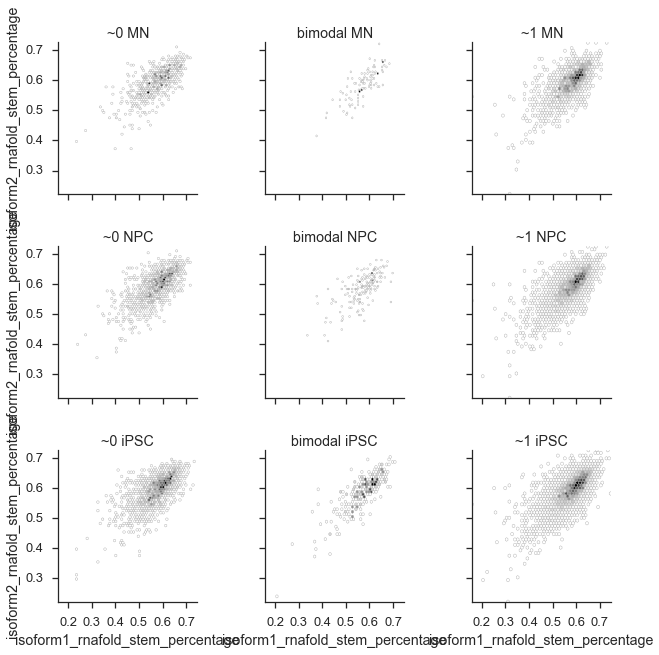

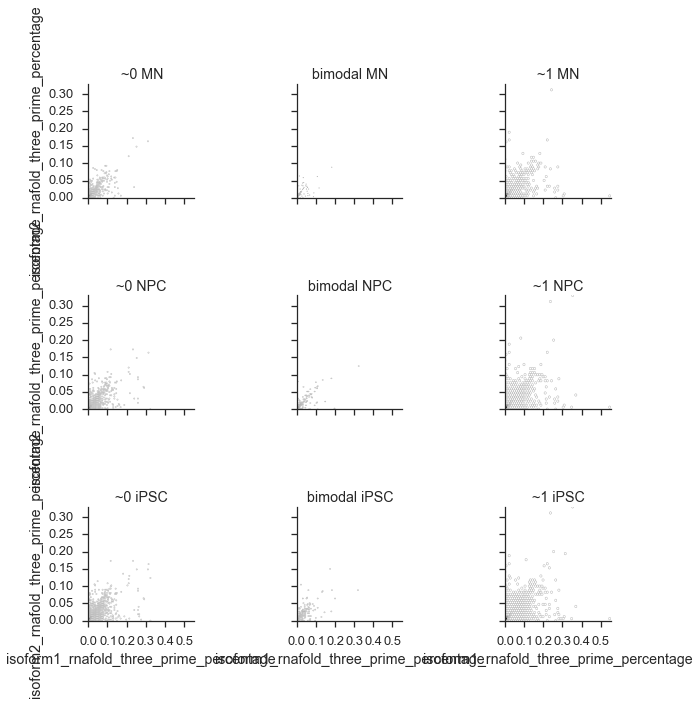

In [187]:
non_numeric_cols = ['translation', 'pfam']

hue_order = '~0', 'bimodal', '~1'
palette = [MODALITY_TO_COLOR[m] for m in hue_order]

for isoform_col in isoform_cols:
    if any(non_numeric in isoform_col for non_numeric in non_numeric_cols):
        continue
    
    x = isoform_col.format(1)
    y = isoform_col.format(2)
    
#     g = sns.FacetGrid(modalities_annotated, col='modality', row='phenotype', col_order=hue_order)
#     g.map(plt.hexbin, x, y, mincnt=1, gridsize=50, edgecolor=u'darkgrey')
#     g.set_titles("{col_name} {row_name}")
#     g.savefig('{}/modality_features_{}_hexbin.pdf'.format(folder, isoform_col.format('')))

### For Bimodal, merge isoform1 and isoform2, for ~0 use only isoform1 and for ~1 use only isoform2

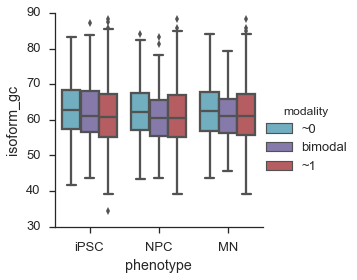

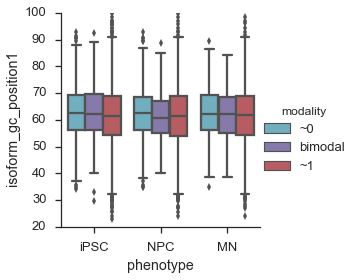

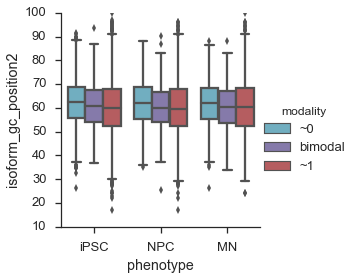

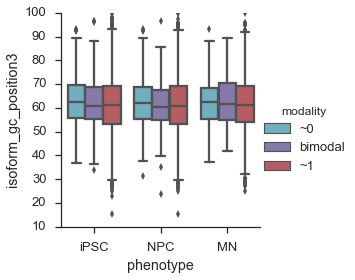

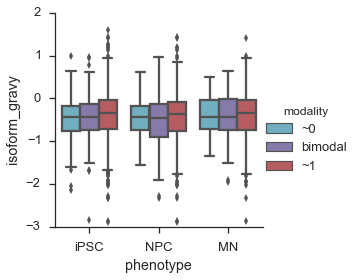

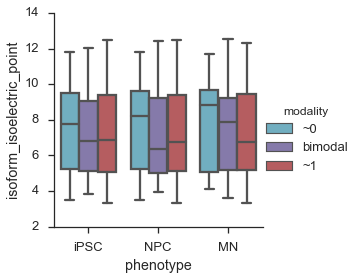

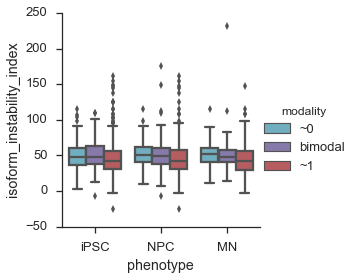

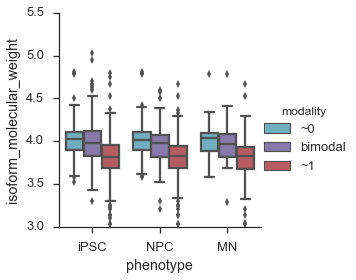

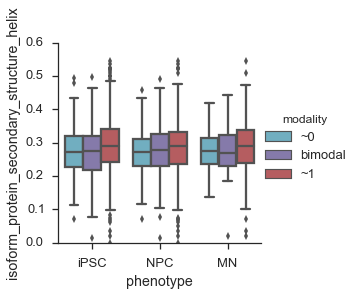

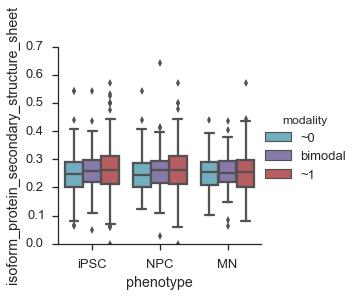

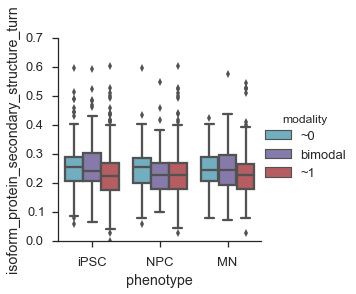

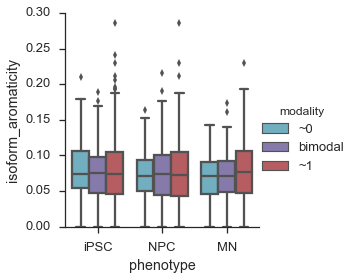

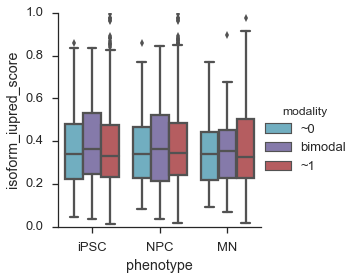

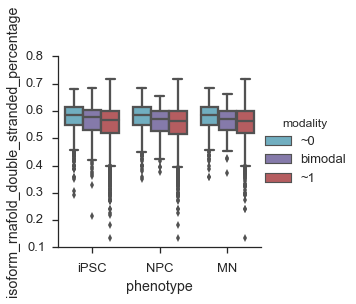

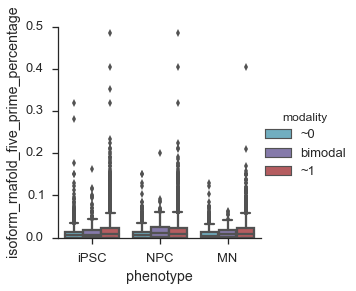

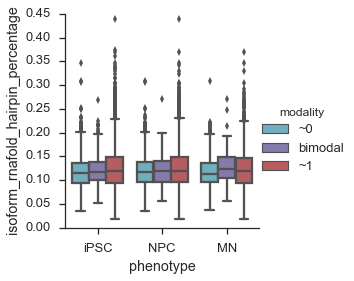

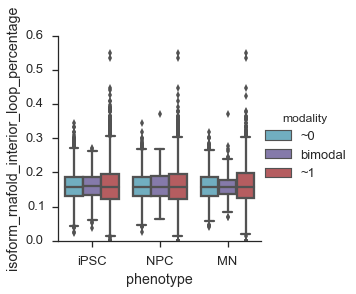

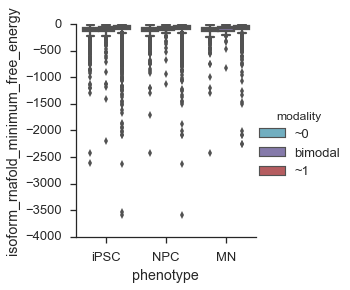

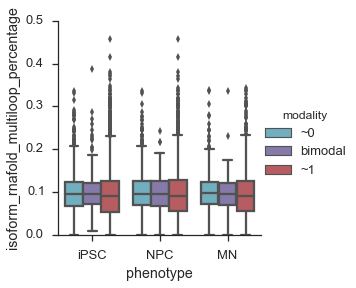

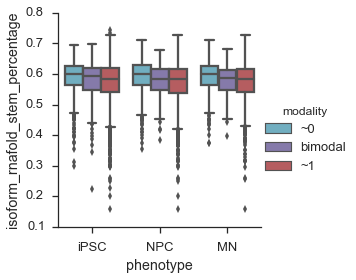

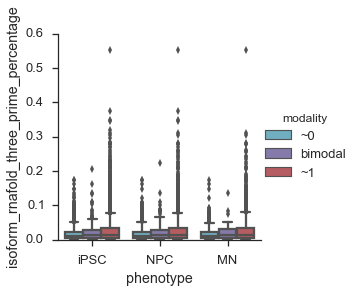

In [190]:
from modish import MODALITY_TO_COLOR

non_numeric_cols = ['translation', 'pfam']

bimodal_ind = modalities_annotated.modality == 'bimodal'
included_ind = modalities_annotated.modality == '~0'
excluded_ind = modalities_annotated.modality == '~1'

hue_order = ['~0', 'bimodal', '~1']
palette = [MODALITY_TO_COLOR[m] for m in hue_order]


for isoform_col in isoform_cols:
    if any(non_numeric in isoform_col for non_numeric in non_numeric_cols):
        continue
        
    isoform_col_no_number = isoform_col.format('')
    
    x = isoform_col.format(1)
    y = isoform_col.format(2)
    
    modalities_annotated.loc[bimodal_ind, isoform_col_no_number] = modalities_annotated.loc[bimodal_ind, [x, y]].mean(axis=1)
    modalities_annotated.loc[included_ind, isoform_col_no_number] = modalities_annotated.loc[included_ind, y]
    modalities_annotated.loc[excluded_ind, isoform_col_no_number] = modalities_annotated.loc[excluded_ind, x]
    
    if 'weight' in isoform_col:
        isoform_col_plain_original = str(isoform_col_no_number)
        isoform_col_plain = isoform_col_plain_original + '_log10'
        modalities_annotated.loc[:, isoform_col_no_number] = np.log10(modalities_annotated.loc[:, isoform_col_plain_original])
    else:
        isoform_col_plain = isoform_col
    
    g = sns.factorplot(y=isoform_col_no_number, data=modalities_annotated, hue='modality', x='phenotype', kind='box',
                      hue_order=hue_order, palette=palette, x_order=study.phenotype_order)
#     g.map(plt.hexbin, x, y, mincnt=1, gridsize=50, edgecolor=u'darkgrey')
#     g.set_titles("{col_name} {row_name}")
    g.savefig('{}/modality_features_{}_boxplot.pdf'.format(folder, isoform_col_plain))

## Count-style things

In [191]:
modalities_annotated.columns

Index([u'phenotype', u'event_name', u'modality', u'criteria',
       u'criteria_additional', u'criteria_full', u'ensembl_id', u'exon1',
       u'exon1_length', u'exon2',
       ...
       u'isoform_aromaticity', u'isoform_iupred_score',
       u'isoform_rnafold_double_stranded_percentage',
       u'isoform_rnafold_five_prime_percentage',
       u'isoform_rnafold_hairpin_percentage',
       u'isoform_rnafold_interior_loop_percentage',
       u'isoform_rnafold_minimum_free_energy',
       u'isoform_rnafold_multiloop_percentage',
       u'isoform_rnafold_stem_percentage',
       u'isoform_rnafold_three_prime_percentage'],
      dtype='object', length=141)

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned/count_style_figures': File exists
3
4
6
9
3
7
2


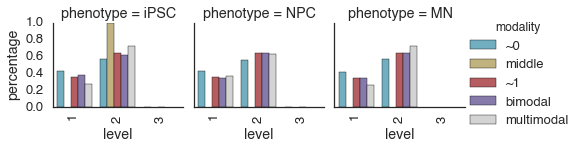

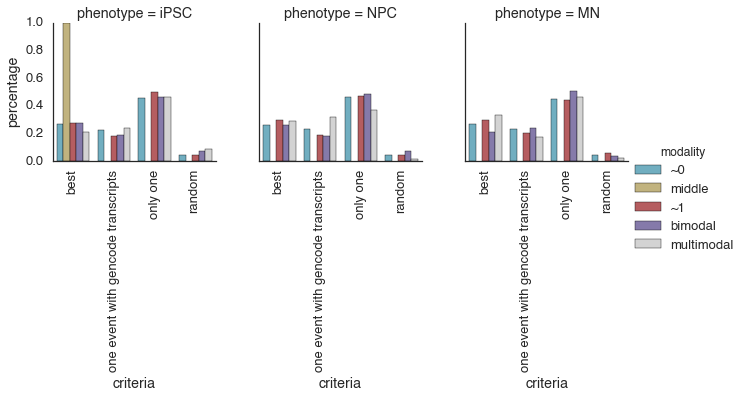

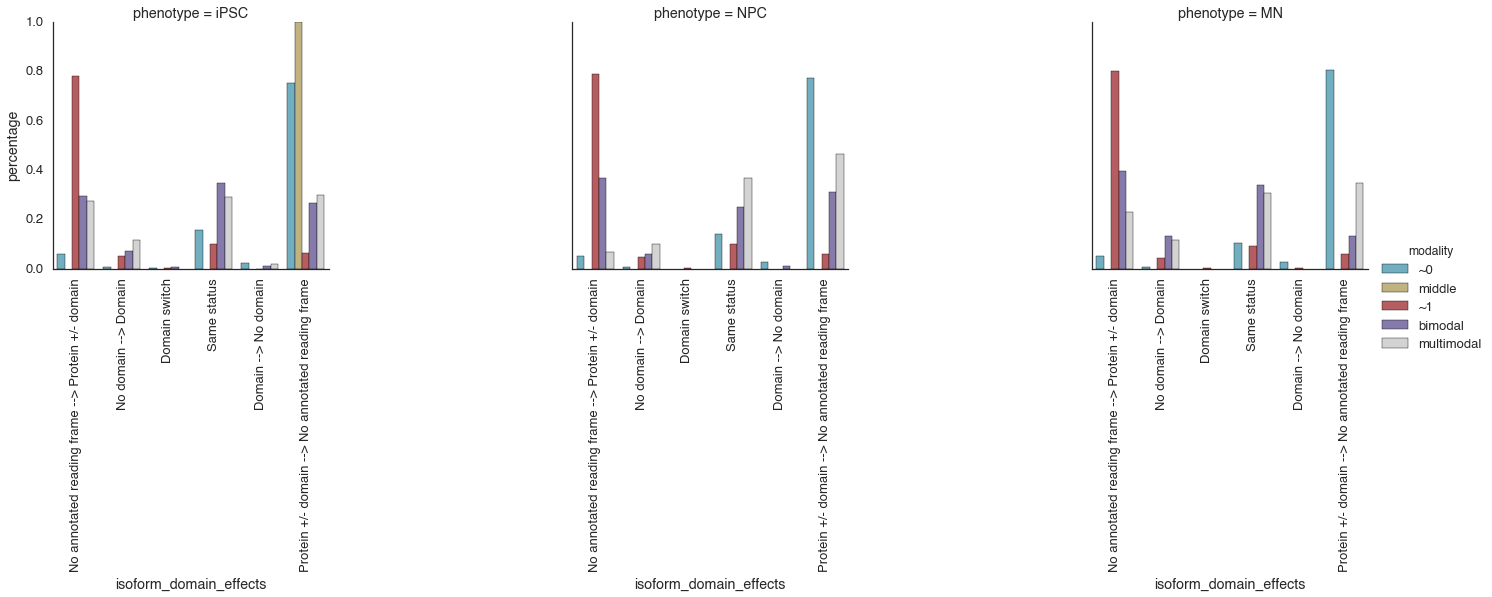

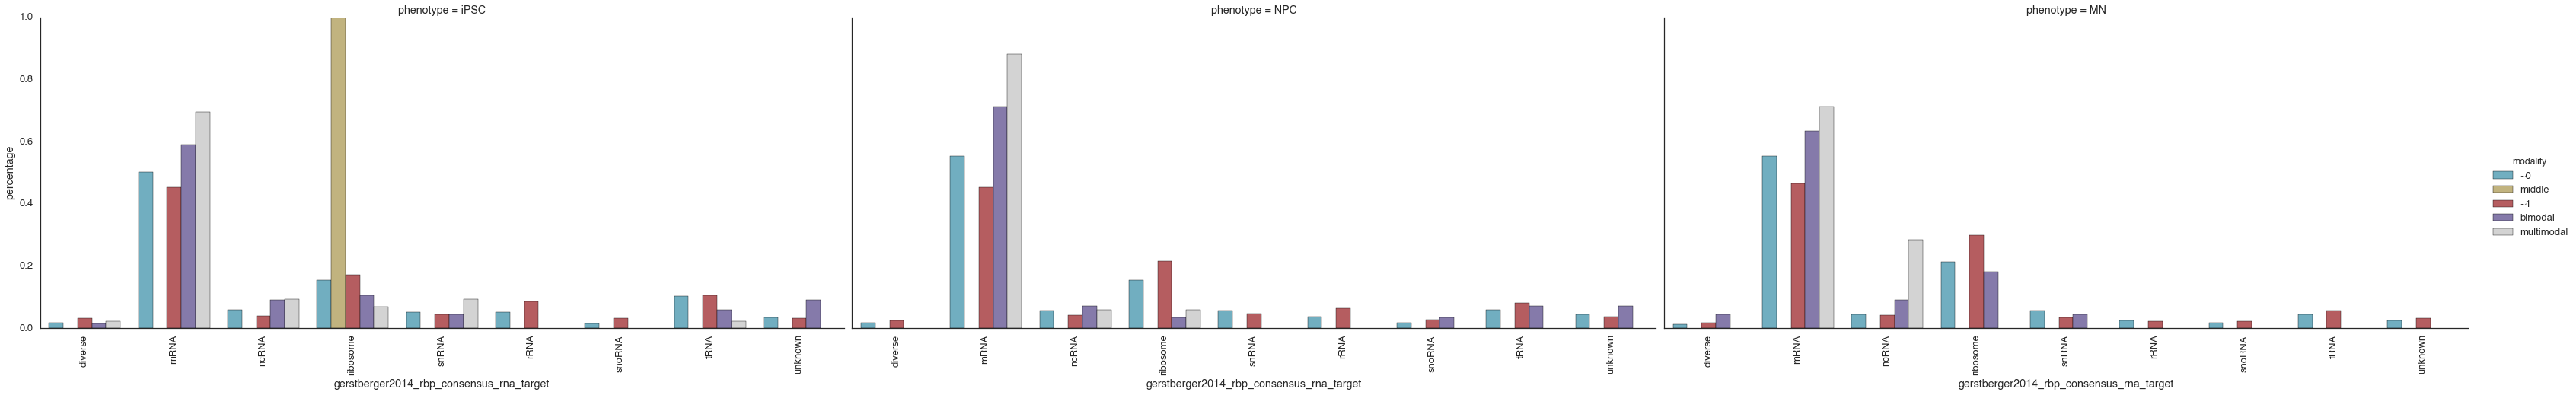

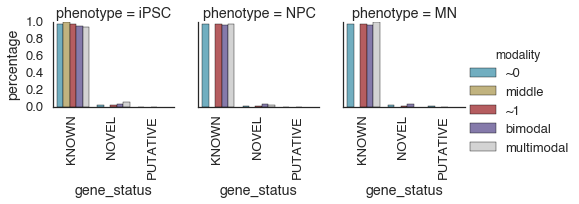

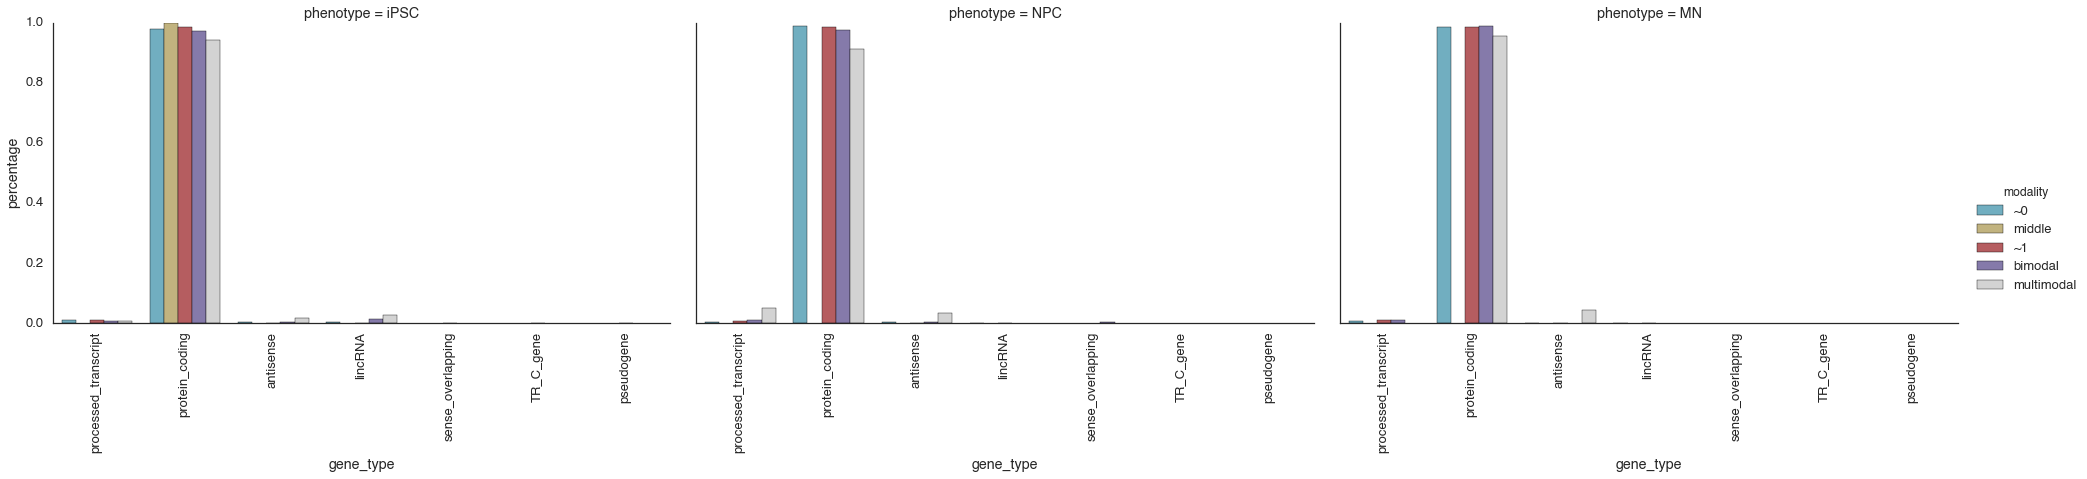

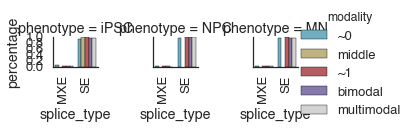

In [43]:
count_figure_folders = '{}/count_style_figures'.format(folder)
! mkdir $count_figure_folders

count_cols = ['level', 'criteria', u'isoform_domain_effects', 
              'gerstberger2014_rbp_consensus_rna_target', 'gene_status', 
              'gene_type', 'splice_type']

order = ['~0', 'bimodal', '~1']
isoform_domain_effects_order = [
    'No annotated reading frame --> Protein +/- domain',
    'No domain --> Domain',
    'Domain switch',       
    'Same status',
    'Domain --> No domain',
    'Protein +/- domain --> No annotated reading frame', 
]

for col in count_cols:
    s = modalities_annotated.groupby(['phenotype', 'modality', col]).size()
    df = s.reset_index()
    df = df.rename(columns={0: 'count'})
    df['percentage'] = df.groupby(['phenotype', 'modality'])['count'].apply(lambda x: x/x.sum())
#     g = sns.FacetGrid(df, col='phenotype', hue='modality', hue_order=hue_order, palette=palette,
#                       col_order=study.phenotype_order)
#     g.map(barh, 'percentage', col)
    if col == 'isoform_domain_effects':
        order = isoform_domain_effects_order
        palette = 'PRGn'
    else:
        order = None
        palette = 'husl'

    print len(df[col].unique())
    g = sns.factorplot(hue='modality', col='phenotype', x=col, y='percentage', kind='bar',  data=df,
#                        hue_order=hue_order, palette=palette, 
#                        hue_order=hue_order, 
#                        aspect=len(df[col].unique())/2,
#                        size=2
                       size=len(df[col].unique())*.75,
                       aspect=max(1, len(df[col].unique())*0.25),
                       order=order,
                       hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE,
#                        palette=palette,
#                        order=order,
                       col_order=study.phenotype_order)
    for ax in g.axes.flat:
        xticklabels = map(lambda x: x.get_text(), ax.get_xticklabels())
        ax.set_xticklabels(xticklabels, rotation=90)
#     fig.tight_layout()
    g.savefig('{}/modality_features_{}_barplot.pdf'.format(count_figure_folders, col))

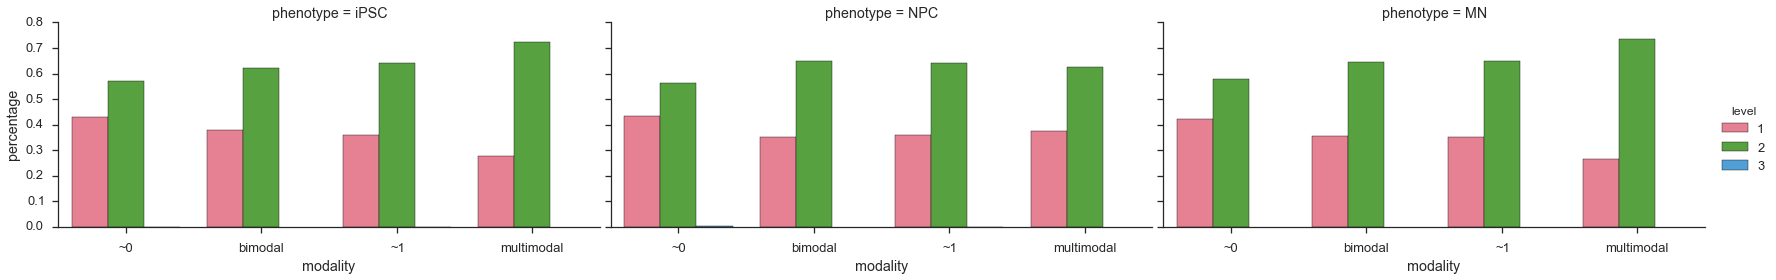

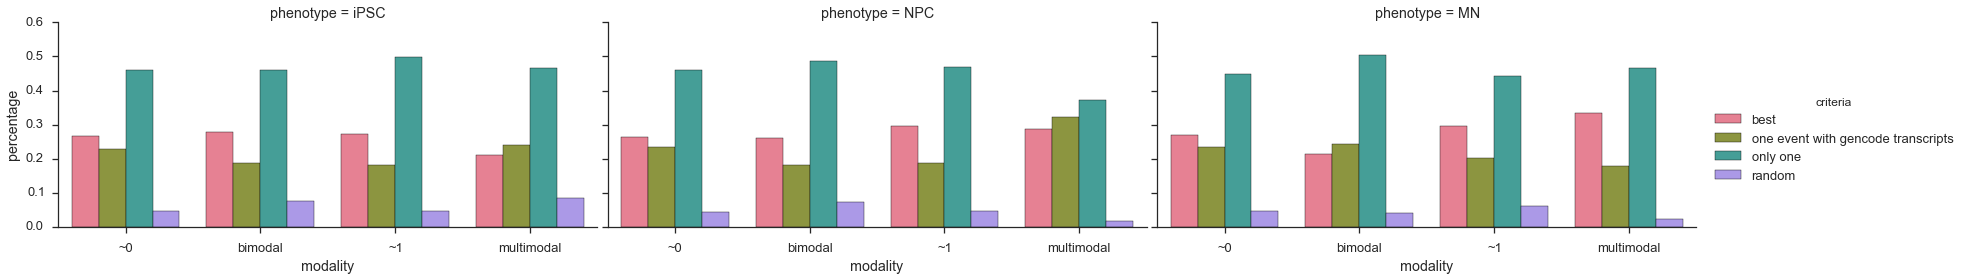

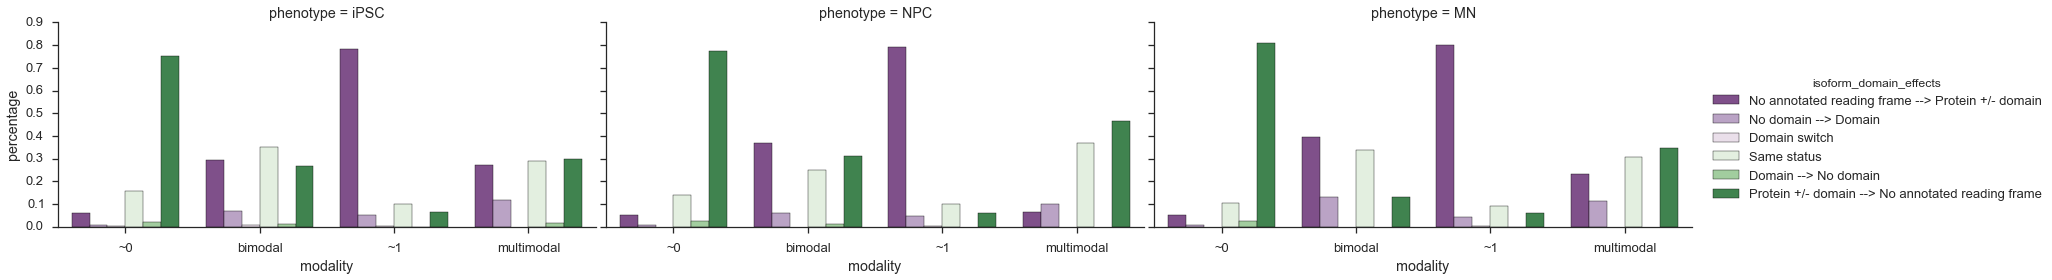

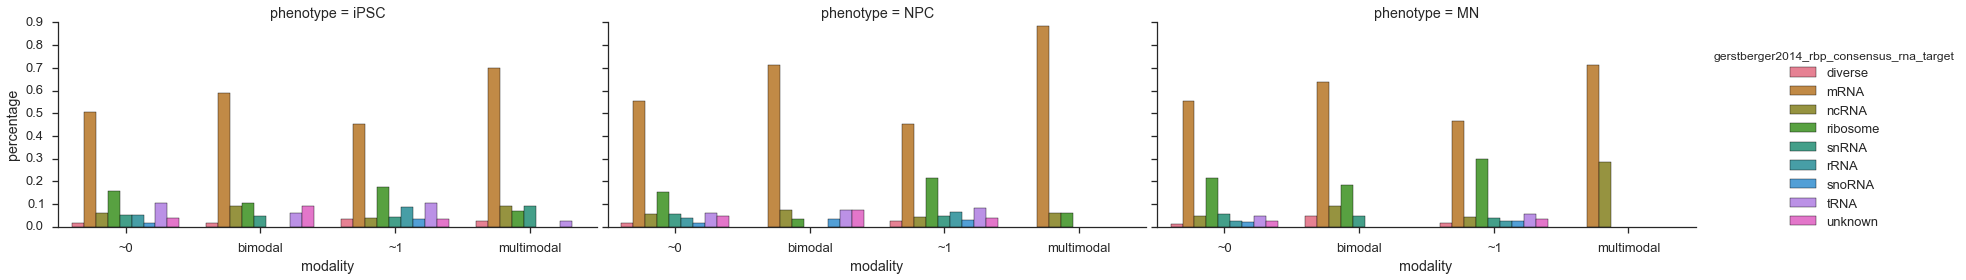

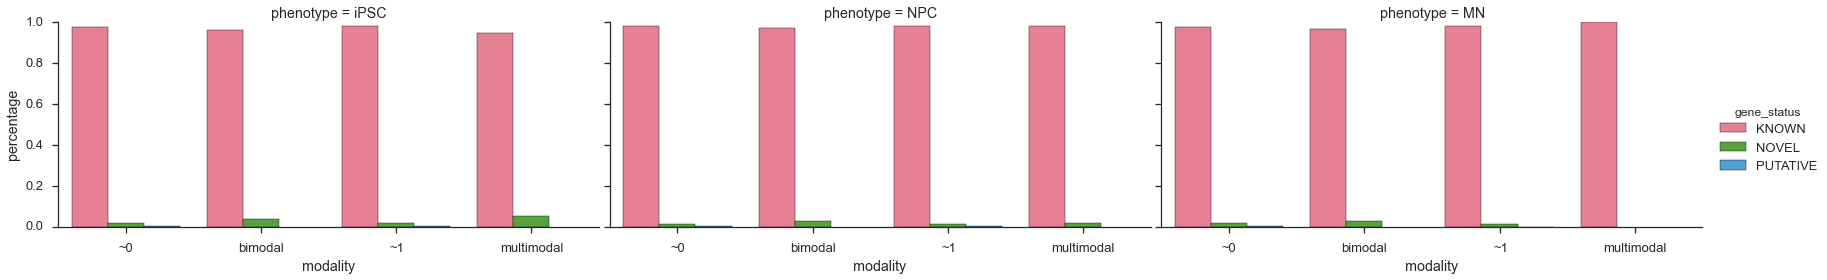

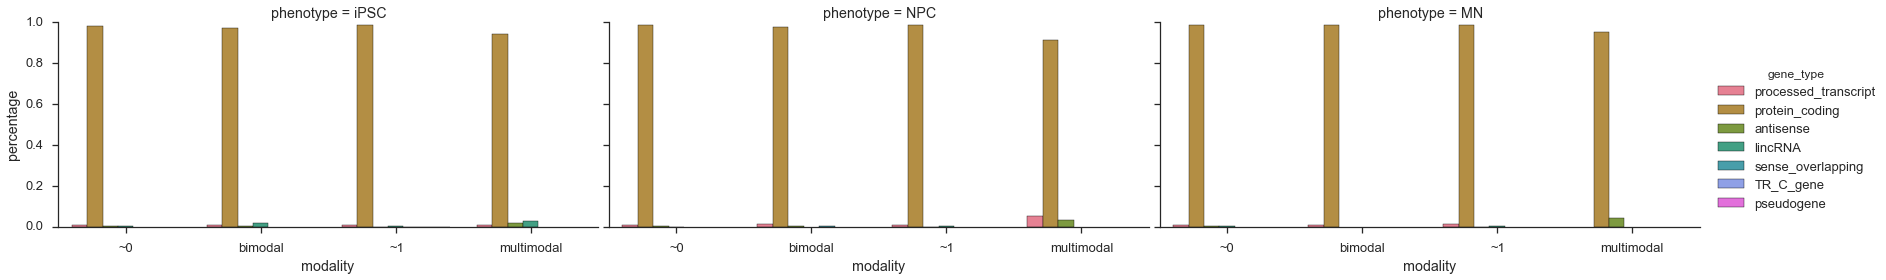

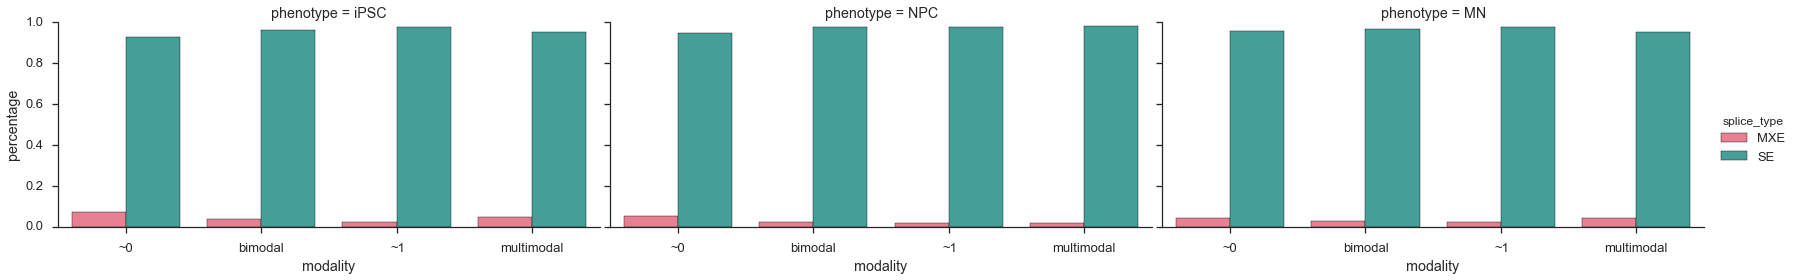

In [192]:
count_cols = ['level', 'criteria', u'isoform_domain_effects', 
              'gerstberger2014_rbp_consensus_rna_target', 'gene_status', 
              'gene_type', 'splice_type']

order = ['~0', 'bimodal', '~1', 'multimodal']
isoform_domain_effects_order = [
    'No annotated reading frame --> Protein +/- domain',
    'No domain --> Domain',
    'Domain switch',       
    'Same status',
    'Domain --> No domain',
    'Protein +/- domain --> No annotated reading frame', 
]

for col in count_cols:
    s = modalities_annotated.groupby(['phenotype', 'modality', col]).size()
    df = s.reset_index()
    df = df.rename(columns={0: 'count'})
    df['percentage'] = df.groupby(['phenotype', 'modality'])['count'].apply(lambda x: x/x.sum())
#     g = sns.FacetGrid(df, col='phenotype', hue='modality', hue_order=hue_order, palette=palette,
#                       col_order=study.phenotype_order)
#     g.map(barh, 'percentage', col)
    if col == 'isoform_domain_effects':
        hue_order = isoform_domain_effects_order
        palette = 'PRGn'
    else:
        hue_order = None
        palette = 'husl'

    g = sns.factorplot(hue=col, col='phenotype', x='modality', y='percentage', kind='bar',  data=df,
#                        hue_order=hue_order, palette=palette, 
                       hue_order=hue_order, aspect=2,
                       palette=palette,
                       order=order,
                       col_order=study.phenotype_order)
    g.savefig('{}/modality_features_{}_barplot.pdf'.format(folder, col))

In [193]:
checked_features = list(boolean_cols) + list(numerical_cols) + count_cols
checked_features

['ribosomal',
 'ribosomal_subunit',
 'gerstberger2014_tf',
 'gerstberger2014_rbp',
 'gerstberger2014_rbp_target_mrna',
 'gerstberger2014_rbp_target_ncrna',
 'gerstberger2014_rbp_target_ribosome',
 'gerstberger2014_rbp_target_trna',
 'cell_cycle',
 'cell_surface_markers',
 'bioguo_animaltfdb_chromatin_remodeler',
 'bioguo_animaltfdb_tf',
 'bioguo_animaltfdb_cofactor',
 'exon2_merkin2012_ancient',
 'exon2_divisible_by_3',
 'expression_var_log2_plus1',
 'expression_mean_log2_plus1',
 'domazetloso2008_phylostratum',
 'exon1_length',
 'exon2_length',
 'exon2_splice_site_3p_score',
 'exon2_splice_site_5p_score',
 'exon2_phastcons_placental_mammal',
 'exon3_length',
 'intron_length',
 'isoform1_aromaticity',
 'isoform2_aromaticity',
 'isoform1_gravy',
 'isoform2_gravy',
 'isoform1_instability_index',
 'isoform2_instability_index',
 'isoform1_isoelectric_point',
 'isoform2_isoelectric_point',
 'isoform1_iupred_score',
 'isoform2_iupred_score',
 'isoform1_molecular_weight',
 'isoform2_molecular

In [194]:
[x for x in study.splicing.feature_data.columns if x not in checked_features]

['criteria_additional',
 'criteria_full',
 'ensembl_id',
 'exon1',
 'exon2',
 'exon3',
 'exon4',
 'exon4_length',
 'gencode_id',
 'gene_name',
 'junction_exons12',
 'junction_exons13',
 'junction_exons23',
 'junction_exons24',
 'junction_exons34',
 'strand',
 'one_ensembl_id',
 'isoform1_translation',
 'isoform2_translation',
 'exon2_splice_site_3p_seq',
 'exon2_splice_site_5p_seq',
 'isoform1_pfam_accession',
 'isoform2_pfam_accession',
 'isoform1_pfam_name',
 'isoform2_pfam_name',
 'isoform1_pfam_go_name',
 'isoform2_pfam_go_name',
 'isoform1_pfam_go_id',
 'isoform2_pfam_go_id',
 'biomark_neural_panel',
 'confident_rbp',
 'gerstberger2014_rbp_domains[count]',
 'gerstberger2014_rbp_family_targets',
 'gerstberger2014_rbp_parologous_family_id',
 'gerstberger2014_rbp_target_diverse',
 'havana_gene',
 'rbp',
 'synapse',
 'tag',
 'transcript_id',
 'transcript_name',
 'transcript_status',
 'transcript_type',
 'transcription_factor']

/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned/modality_transitions_iPSC_to_NPC_heatmap.pdf
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned/modality_transitions_NPC_to_MN_heatmap.pdf
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned/modality_transitions_iPSC_to_MN_heatmap.pdf


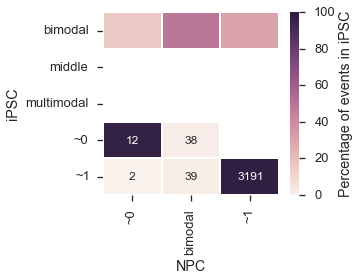

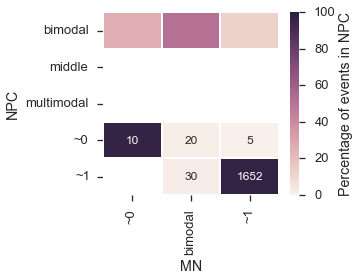

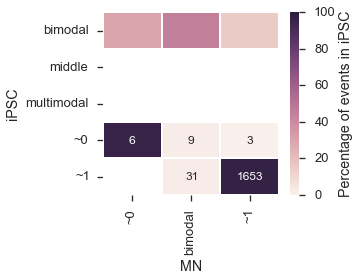

In [195]:
import collections
import matplotlib as mpl
from scipy.stats import fisher_exact
import colorsys


grouped = study.supplemental.modalities_tidy.groupby('phenotype')

modality_order = ['~0', 'bimodal', "~1"]

transitions = study.phenotype_transitions + [('iPSC', 'MN')]

for phenotype1, phenotype2 in transitions:
    modality_transitions = pd.DataFrame(0, index=MODALITY_ORDER, 
                                        columns=MODALITY_ORDER)
    modality_transitions.index.name = phenotype1
    modality_transitions.columns.name = phenotype2
    
    phenotypes = (phenotype1, phenotype2)
    
    df = pd.concat([grouped.get_group(phenotype1), grouped.get_group(phenotype2)])
    df = df.set_index('phenotype')
    df = df.dropna()
    df = df.groupby('event_name').filter(lambda x: len(x) == 2)
    
    for event_name, df2 in df.groupby('event_name'):
            modality1 = df2.ix[phenotype1].modality
            modality2 = df2.ix[phenotype2].modality
            modality_transitions.ix[modality1, modality2] += 1
    fig, ax = plt.subplots(figsize=(5, 4))
    modality_sizes = modality_transitions.sum(axis=1)
    modality_transitions = modality_transitions.reindex(index=modality_order, columns=modality_order)
    percentages = 100*modality_transitions.divide(modality_sizes,axis=0)
    
    # Anything that's zero will be whited out
    mask = percentages == 0
    sns.heatmap(percentages, cbar_kws={'label': 'Percentage of events in {}'.format(phenotype1)}, annot=False,
                vmin=0, vmax=100, linewidth=1, ax=ax, mask=mask)
    for ytl in ax.get_yticklabels():
        ytl.set(rotation=0)
    for xtl in ax.get_xticklabels():
        xtl.set(rotation=90)
        
    # Modification of seaborn's heatmap annotator
    """Add textual labels with the value in each cell."""
    values = modality_transitions.ix[::-1].values
    mesh = ax.collections[0]
    xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
    for x, y, val, color in zip(xpos.flat, ypos.flat,
                                values.flat, mesh.get_facecolors()):
        if val is not np.ma.masked:
            _, l, _ = colorsys.rgb_to_hls(*color[:3])
            text_color = ".15" if l > .5 else "w"
            val = ("{:g}").format(val)
            ax.text(x, y, val, color=text_color,
                    ha="center", va="center", fontsize=12)
    fig.tight_layout()
    pdf = '{}/modality_transitions_{}_to_{}_heatmap.pdf'.format(folder, phenotype1, phenotype2)
    print pdf
    fig.savefig(pdf)

In [196]:
study.splicing.feature_data.shape

(33693, 117)

In [197]:
splicing_feature_data = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/splicing_feature_data.csv', index_col=0)
print splicing_feature_data.shape
splicing_feature_data.head()

(33693, 83)


criteria  \
event_id                                                       
exon:chr10:100190328-100190427:-@exon:chr10:100...      best   
exon:chr10:100193697-100193848:-@exon:chr10:100...  only one   
exon:chr10:100195392-100195529:-@exon:chr10:100...      best   
exon:chr10:101165513-101165617:-@exon:chr10:101...  only one   
exon:chr10:101419263-101419345:+@exon:chr10:101...  only one   

                                                   criteria_additional  \
event_id                                                                 
exon:chr10:100190328-100190427:-@exon:chr10:100...    appris_principal   
exon:chr10:100193697-100193848:-@exon:chr10:100...                 NaN   
exon:chr10:100195392-100195529:-@exon:chr10:100...    appris_principal   
exon:chr10:101165513-101165617:-@exon:chr10:101...                 NaN   
exon:chr10:101419263-101419345:+@exon:chr10:101...                 NaN   

                                                            criteria_full  \
event_id                                                                    
exon:chr10:100190328-100190427:-@exon:chr10:100...  best,appris_principal   
exon:chr10:100193697-100193848:-@exon:chr10:100...               only one   
exon:chr10:100195392-100195529:-@exon:chr10:100...  best,appris_principal   
exon:chr10:101165513-101165617:-@exon:chr10:101...               only one   
exon:chr10:101419263-101419345:+@exon:chr10:101...               only one   

                                                         ensembl_id  \
event_id                                                              
exon:chr10:100190328-100190427:-@exon:chr10:100...  ENSG00000107521   
exon:chr10:100193697-100193848:-@exon:chr10:100...  ENSG00000107521   
exon:chr10:100195392-100195529:-@exon:chr10:100...  ENSG00000107521   
exon:chr10:101165513-101165617:-@exon:chr10:101...  ENSG00000120053   
exon:chr10:101419263-101419345:+@exon:chr10:101...  ENSG00000198018   

                                                                               exon1  \
event_id                                                                               
exon:chr10:100190328-100190427:-@exon:chr10:100...  exon:chr10:100190328-100190427:-   
exon:chr10:100193697-100193848:-@exon:chr10:100...  exon:chr10:100193697-100193848:-   
exon:chr10:100195392-100195529:-@exon:chr10:100...  exon:chr10:100195392-100195529:-   
exon:chr10:101165513-101165617:-@exon:chr10:101...  exon:chr10:101165513-101165617:-   
exon:chr10:101419263-101419345:+@exon:chr10:101...  exon:chr10:101419263-101419345:+   

                                                    exon1_length  \
event_id                                                           
exon:chr10:100190328-100190427:-@exon:chr10:100...           100   
exon:chr10:100193697-100193848:-@exon:chr10:100...           152   
exon:chr10:100195392-100195529:-@exon:chr10:100...           138   
exon:chr10:101165513-101165617:-@exon:chr10:101...           105   
exon:chr10:101419263-101419345:+@exon:chr10:101...            83   

                                                                               exon2  \
event_id                                                                               
exon:chr10:100190328-100190427:-@exon:chr10:100...  exon:chr10:100189548-100189646:-   
exon:chr10:100193697-100193848:-@exon:chr10:100...  exon:chr10:100190888-100191048:-   
exon:chr10:100195392-100195529:-@exon:chr10:100...  exon:chr10:100195029-100195171:-   
exon:chr10:101165513-101165617:-@exon:chr10:101...  exon:chr10:101163481-101163631:-   
exon:chr10:101419263-101419345:+@exon:chr10:101...  exon:chr10:101419619-101419721:+   

                                                    exon2_length  \
event_id                                                           
exon:chr10:100190328-100190427:-@exon:chr10:100...            99   
exon:chr10:100193697-100193848:-@exon:chr10:100...           161   
exon:chr10:100195392-100195529:-@exon:chr10:100...           14

### Modality bar graph of events inconsistent with pooled

In [200]:
modalities_inconsistent = study.percent_pooled_inconsistent(feature_subset=study.supplemental.modalities_tidy.event_name.unique())

/home/obotvinnik/workspace-git/flotilla/flotilla/data_model/splicing.py:218: FutureWarning: diff is deprecated. Use difference instead
  not_measured_in_pooled = singles.columns.diff(pooled.columns)


In [255]:
folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned'

In [54]:
singles_grouped = study.splicing.singles.groupby(study.sample_id_to_phenotype)
pooled_grouped = study.splicing.pooled.groupby(study.sample_id_to_phenotype)

bins = np.arange(0, 1.05, 0.05)

min_difference = 0.2

pooled_inconsistent_dir = '{}/pooled_inconsistent'.format(folder)
! mkdir $pooled_inconsistent_dir

mean_diff_dfs = []

for (phenotype, modality), df in study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']):
    singles = singles_grouped.get_group(phenotype).ix[:, df.event_name].dropna(how='all',axis=1)
    pooled = pooled_grouped.get_group(phenotype).ix[:, df.event_name].dropna(how='all', axis=1)
    
    singles, pooled = singles.align(pooled, axis=1, join='inner')
    mean_difference = pooled.apply(lambda x: singles.subtract(x, axis=1).abs().mean(axis=0), axis=1)
    
    mean_diff_df = mean_difference.unstack().reset_index()
    mean_diff_df['phenotype'] = phenotype
    mean_diff_df['modality'] = modality
    mean_diff_dfs.append(mean_diff_df)
    
    events = mean_difference.columns[(mean_difference > min_difference).any(axis=0)]
#     for event in events:
#         gene_name = study.splicing.feature_data.gene_name[event]
#         study.plot_event(event, sample_subset='~outlier')
#         fig = plt.gcf()
#         fig.savefig('{}/{}_{}_{}_{}.pdf'.format(
#                 pooled_inconsistent_dir, modality, phenotype, gene_name, event, phenotype))
    
mean_diff_df = pd.concat(mean_diff_dfs)
mean_diff_df = mean_diff_df.rename(columns={0: 'mean diff', 'level_0': 'event_name', 
                                            'level_1':'pooled_id'})
mean_diff_df.head()

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned/pooled_inconsistent': File exists


event_name pooled_id  mean diff  \
0  exon:chr10:1094804-1094875:-@exon:chr10:108993...     M2_05   0.379633   
1  exon:chr10:1094804-1094875:-@exon:chr10:108993...   M2nd_13   0.465494   
2  exon:chr10:1094804-1094875:-@exon:chr10:108993...   M2nd_21   0.462063   
3  exon:chr10:16859314-16859412:-@exon:chr10:1685...     M2_05   0.297119   
4  exon:chr10:16859314-16859412:-@exon:chr10:1685...   M2nd_13   0.263381   

  phenotype modality  
0        MN  bimodal  
1        MN  bimodal  
2        MN  bimodal  
3        MN  bimodal  
4        MN  bimodal

In [71]:
pooled_inconstent_folder = '{}/pooled_inconsistent_delta_psi'.format(folder)
! mkdir $pooled_inconstent_folder

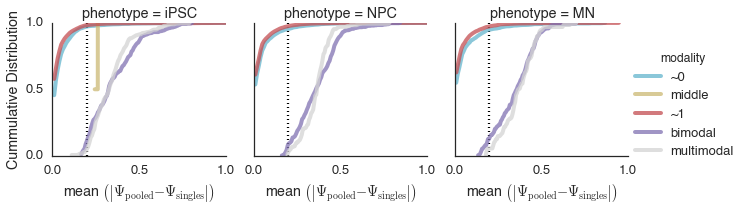

In [72]:
from flotilla.visualize.generic import cdfplot

g = sns.FacetGrid(mean_diff_df, col='phenotype', col_order=study.phenotype_order, hue='modality', size=3,
                  hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, legend_out=True)
g.map(cdfplot, 'mean diff', log=False, alpha=0.75, linewidth=4)

g.set(ylim=(0, 1))
for ax in g.axes.flat:
    ax.locator_params(nbins=4)
    if ax.is_first_col():
        ax.set_ylabel('Cummulative Distribution')
    xmin, xmax, ymin, ymax = ax.axis()
    ax.vlines(min_difference, ymin, ymax, linestyle='dotted')
    ax.set(xlim=(0, xmax), 
           xlabel=r'mean $\left(\left|\Psi_{\mathrm{pooled}} - \Psi_{\mathrm{singles}}\right|\right)$')
g.fig.tight_layout()
g.add_legend();
g.savefig('{}/modality_pooled_inconsistent_cdf.pdf'.format(pooled_inconstent_folder))

In [73]:
mean_diff_df.sort_values?

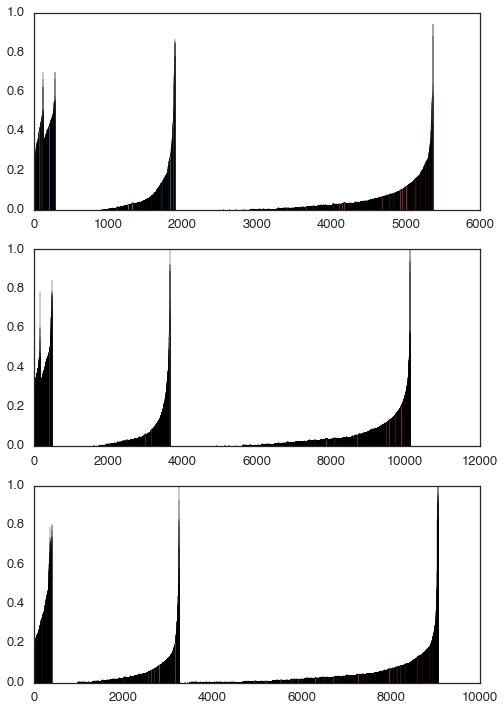

In [74]:
fig, axes = plt.subplots(figsize=(16, 12), nrows=3)
for ax, (phenotype, phenotype_df) in zip(axes, mean_diff_df.groupby('phenotype')):
    phenotype_df['mean diff rank'] = phenotype_df['mean diff'].rank()
    for modality, modality_df in phenotype_df.groupby('modality'):
        x = modality_df['mean diff rank']
        y = modality_df['mean diff']
        color = MODALITY_TO_COLOR[modality]
        ax.bar(x, y, color=color, linewidth=0)
    xmax = phenotype_df['mean diff rank'].max() + 1
    ax.set(xlim=(0, xmax), xlabel='Rank')
    sns.despine()
#     df = df.sort_values('mean diff')
fig.tight_layout()
fig.savefig('{}/delta_psi_ranked_barplot.pdf'.format(pooled_inconstent_folder))

/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned/modality_transitions_iPSC_to_NPC_heatmap.pdf
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned/modality_transitions_NPC_to_MN_heatmap.pdf
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/binned/modality_transitions_iPSC_to_MN_heatmap.pdf


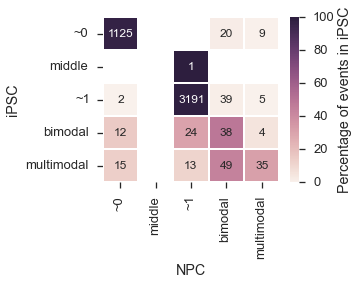

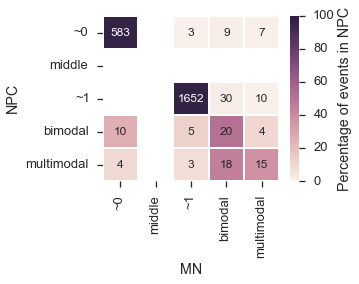

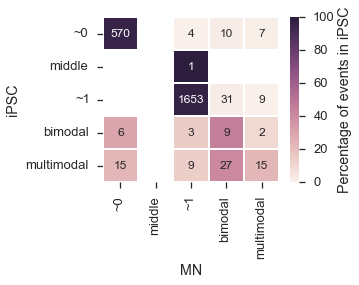

In [262]:
import collections
import matplotlib as mpl
from scipy.stats import fisher_exact
import colorsys


grouped = study.supplemental.modalities_tidy.groupby('phenotype')

phenotype_transitions = study.phenotype_transitions + [('iPSC', 'MN')]

for phenotype1, phenotype2 in phenotype_transitions:
    modality_transitions = pd.DataFrame(0, index=MODALITY_ORDER, 
                                        columns=MODALITY_ORDER)
    modality_transitions.index.name = phenotype1
    modality_transitions.columns.name = phenotype2
    
    df = study.supplemental.modalities_tidy.ix[grouped.groups[phenotype1] 
                                               + grouped.groups[phenotype2]].set_index('phenotype').dropna()
    df = df.groupby('event_name').filter(lambda x: len(x) == 2)
    
    for event_name, df2 in df.groupby('event_name'):
            modality1 = df2.ix[phenotype1].modality
            modality2 = df2.ix[phenotype2].modality
            modality_transitions.ix[modality1, modality2] += 1
    fig, ax = plt.subplots(figsize=(5, 4))
    modality_sizes = modality_transitions.sum(axis=1)
    modality_transitions = modality_transitions.reindex(index=MODALITY_ORDER, columns=MODALITY_ORDER)
    percentages = 100*modality_transitions.divide(modality_sizes,axis=0)
    mask = percentages == 0
    sns.heatmap(percentages, cbar_kws={'label': 'Percentage of events in {}'.format(phenotype1)}, annot=False,
                vmin=0, vmax=100, linewidth=1, ax=ax, mask=mask)
    for ytl in ax.get_yticklabels():
        ytl.set(rotation=0)
    for xtl in ax.get_xticklabels():
        xtl.set(rotation=90)
        
    # Modification of seaborn's heatmap
    """Add textual labels with the value in each cell."""
    values = modality_transitions.ix[::-1].values
    mesh = ax.collections[0]
    xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
    for x, y, val, color in zip(xpos.flat, ypos.flat,
                                values.flat, mesh.get_facecolors()):
        if val is not np.ma.masked:
            _, l, _ = colorsys.rgb_to_hls(*color[:3])
            text_color = ".15" if l > .5 else "w"
            val = ("{:g}").format(val)
            ax.text(x, y, val, color=text_color,
                    ha="center", va="center", fontsize=12)
    fig.tight_layout()
    pdf = '{}/modality_transitions_{}_to_{}_heatmap.pdf'.format(folder, phenotype1, phenotype2)
    print pdf
    fig.savefig(pdf)

In [ ]:
modalities_all_phenotypes = modalities_tidy.groupby('event_name').filter(
    lambda x: len(x) == len(study.phenotype_order))

modalities_all_phenotypes.head()
modalities_all_phenotypes = modalities_all_phenotypes.set_index('phenotype')
modalities_all_phenotypes.head()
import collections

modality_celltype_transitions = collections.Counter(
    tuple(df.ix[study.phenotype_order, 'modality'].tolist()) for name, df in modalities_all_phenotypes.groupby(['event_name']))
modality_celltype_transitions
# modality_celltype_transitions = pd.Series(modality_celltype_transitions)
s = pd.Series(modality_celltype_transitions)
s.sort(ascending=False)
modality_transitions_df = s.reset_index()
modality_transitions_df.columns = study.phenotype_order + ['n_transitions']
modality_transitions_df.head(10)

In [ ]:
cbar_ax = plt.gca()

In [ ]:
import matplotlib as mpl
import colorsys

modality_transitions_df = modality_transitions_df.ix[modality_transitions_df.n_transitions >= 10]

modality_to_int = dict(zip(modality_order, range(len(modality_order))))

modality_transitions_plot_data = modality_transitions_df.ix[:, study.phenotype_order]
plot_data = modality_transitions_plot_data.applymap(lambda x: modality_to_int[x])
cmap = mpl.colors.ListedColormap([modality_colors[x] for x in modality_order])

fig = plt.figure(figsize=(6, 6))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=3, wspace=.05, width_ratios=(1, .15, .15))

ax_heatmap = plt.subplot(gs[:, 0])
ax_barplot_bottom = plt.subplot(gs[:, 1])
ax_barplot_top = plt.subplot(gs[:, 2])

# Plot heatmap
sns.heatmap(plot_data, cmap=cmap, linewidth=1, cbar_ax=cbar_ax, ax=ax_heatmap)

mesh = ax_heatmap.collections[0]
annotation = modality_transitions_plot_data.ix[::-1]

xpos, ypos = np.meshgrid(ax_heatmap.get_xticks(), ax_heatmap.get_yticks())
for x, y, val, color in zip(xpos.flat, ypos.flat,
                            annotation.values.flat, mesh.get_facecolors()):
    if val is not np.ma.masked:
        _, l, _ = colorsys.rgb_to_hls(*color[:3])
        text_color = ".15" if l > .6 else "w"
        s = ("{}").format(val)
        ax_heatmap.text(x, y, s, color=text_color,
                ha="center", va="center", fontsize=12)
sns.despine(ax=ax_heatmap, left=True, bottom=True)
ax_heatmap.set(yticks=[])
ax_heatmap.xaxis.tick_top()
ax_heatmap.xaxis.set_label_position('top')

# Plot bottom half of barplot
y = np.arange(plot_data.shape[0])

# Necessary to line up with heatmap
ylim = (0, y.max()*1.05)
x = modality_transitions_df.n_transitions[::-1]
ax_barplot_bottom.barh(y, x, color='darkgrey', edgecolor='#262626', linewidth=1, zorder=-1)
ax_barplot_bottom.set(ylim=ylim, xlim=(0, 1000), 
               yticks=[])
ax_barplot_bottom.locator_params('x', nbins=2)
ax_barplot_bottom.grid('on', axis='x', color='white', zorder=1000, linewidth=1)

sns.despine(ax=ax_barplot_bottom, bottom=True, top=False)
for label in ax_barplot_bottom.get_xticklabels():
    label.set_rotation(-90)
ax_barplot_bottom.xaxis.set_ticks_position('top')
ax_barplot_bottom.xaxis.set_label_position('top')

# Plot top half barplot
ymax = y.max()*1.05
ylim = (0, ymax)
x = modality_transitions_df.n_transitions[::-1]
ax_barplot_top.barh(y, x, color='darkgrey', edgecolor='#262626', linewidth=1, zorder=-1)
print x.max()
ax_barplot_top.set(ylim=ylim, xlim=(5000, x.max()*1.05), yticks=[])
ax_barplot_top.locator_params('x', nbins=2)
ax_barplot_top.grid('on', axis='x', color='white', zorder=1000, linewidth=1)

sns.despine(ax=ax_barplot_top, bottom=True, top=False, left=True)
for label in ax_barplot_top.get_xticklabels():
    label.set_rotation(-90)
ax_barplot_top.xaxis.set_ticks_position('top')
ax_barplot_top.xaxis.set_label_position('top')


# Add train track lines to show broken axis
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax_barplot_bottom.transAxes, color='k', clip_on=False, linewidth=1)
# ax.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax_barplot_bottom.plot((1-d,1+d),(1-d,1+d), **kwargs)    # top-right diagonal

kwargs.update(transform=ax_barplot_top.transAxes)  # switch to the bottom axes
ax_barplot_top.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
# ax2.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal




# fig.tight_layout()
fig.savefig('{}/modality_transition_heatmap_all.pdf'.format(folder))

In [ ]:
study.save('singlecell_pnm_figure3_modalities')

In [ ]:
rang(2)

In [ ]:
from flotilla.visualize.gene_ontology import plot_go_enrichment

In [ ]:
# import itertools



# def plot_go_enrichment(go, ax=None):
#     go.bonferonni_corrected_p_value = go.bonferonni_corrected_p_value.replace(0, np.nan)
#     vmin = max(go.bonferonni_corrected_p_value.dropna().min(), 1e-25)
#     if np.isnan(vmin):
#         vmin = 1e-25
#     go.loc[:, 'bonferonni_corrected_p_value'] = go.bonferonni_corrected_p_value.fillna(vmin*.9)
#     if go.shape[0] > 20:
#         go = go.iloc[-20: , :]
#     go_subset = go
#     if ax is None:
#         fig, ax = plt.subplots(figsize=(12, max(go_subset.shape[0]*.25, 4)))
#     else:
#         ax = plt.gca()
#         fig = plt.gcf()

#     bottom = np.arange(go_subset.shape[0])
#     width = -np.log10(go_subset.bonferonni_corrected_p_value)
#     ax.barh(bottom, width)
#     xticks = list(sorted(list(set(int(x) for x in ax.get_xticks()))))
#     ax.set(yticks=bottom+0.4, yticklabels=go_subset.go_name, xlabel='$-\log_{10} p$-value',
#            ylim=(0, bottom.max()+1))
#     sns.despine()
#     fig.tight_layout()
#     return ax

for (phenotype), phenotype_df in study.supplemental.modalities_tidy.groupby(['phenotype']):
    print phenotype
    background = list(itertools.chain(*study.splicing.feature_data.ensembl_id[phenotype_df.event_name].str.split(',').values))
    for modality, modality_df in phenotype_df.groupby('modality'):
        print '\t', modality
        modality_genes = list(itertools.chain(*study.splicing.feature_data.ensembl_id[modality_df.event_name].str.split(',').values))
        go = study.go_enrichment(modality_genes, background, p_value_cutoff=0.01)
        if go is None or go.empty:
            print '... empty GO enrichment!'
            continue
        ax = plot_go_enrichment(go)
        ax.set_title('{} {}'.format(phenotype, modality))
        fig = plt.gcf()
        fig.tight_layout()
        fig.savefig('{}/modality_go_enrichment_within_celltype_{}_{}.pdf'.format(folder, modality, phenotype))

In [ ]:
import itertools

for (phenotype), phenotype_df in modalities_all_celltypes.groupby(['modality']):
    print phenotype
    background = list(itertools.chain(*study.splicing.feature_data.ensembl_id[phenotype_df.event_name].str.split(',').values))
    for modality, modality_df in phenotype_df.groupby('phenotype'):
        print '\t', modality
        modality_genes = list(itertools.chain(*study.splicing.feature_data.ensembl_id[modality_df.event_name].str.split(',').values))
        go = study.go_enrichment(modality_genes, background, p_value_cutoff=0.01)
        if go is None or go.empty:
            print '\t... empty GO enrichment!'
            continue
        ax = plot_go_enrichment(go)
        ax.set_title('{} {}'.format(phenotype, modality))
        fig = plt.gcf()
#         fig.tight_layout()
        fig.savefig('{}/modality_go_enrichment_across_celltypes_{}_{}.pdf'.format(folder, modality, phenotype))

In [ ]:
import itertools

background = list(itertools.chain(*study.splicing.feature_data.ensembl_id[modalities_all_celltypes.event_name.unique()].str.split(',').values))


for (group), df1 in modalities_all_celltypes.groupby(['modality']):
    print group
    foreground = list(itertools.chain(*study.splicing.feature_data.ensembl_id[df1.event_name].str.split(',').values))
    go = study.go_enrichment(foreground, background, p_value_cutoff=0.1)
    if go is None or go.empty:
        print '\t... empty GO enrichment!'
        continue

    ax = plot_go_enrichment(go)
    ax.set_title(group)
    fig = plt.gcf()
    fig.tight_layout()
    fig.savefig('{}/modality_go_enrichment_across_celltypes_{}.pdf'.format(folder, group))

### Number of TFs and RBPs expressed in the different celltypes

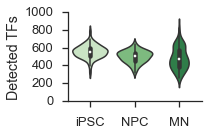

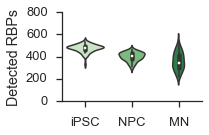

In [263]:
feature_subsets = ['gerstberger2014_tf', 'gerstberger2014_rbp_target_mrna']

for feature_subset in feature_subsets:
    feature_ids = study.expression.feature_subsets[feature_subset]
    data = study.expression.singles.ix[:, feature_ids]
    n_expressed = data.groupby(study.sample_id_to_phenotype).apply(lambda x: (x > 1).sum(axis=1))
    n_expressed = n_expressed.reset_index()
    n_expressed = n_expressed.rename(columns={'level_1': 'sample_id', 0: feature_subset})
    fig, ax = plt.subplots(figsize=(3, 2))
    sns.violinplot(x='phenotype', y=feature_subset, data=n_expressed, order=study.phenotype_order,
                  palette=study.phenotype_color_ordered, linewidth=1.5)
    gene_type = 'RBP' if 'mrna' in feature_subset else 'TF'
    ax.set(ylabel='Detected {}s'.format(gene_type), xlabel='')
#     sns.stripplot(x='phenotype', y=feature_subset, data=n_expressed, order=study.phenotype_order,
#                   palette=study.phenotype_color_ordered, jitter=True)
    ax.locator_params('y', nbins=5)
    sns.despine()
    fig.tight_layout()
    fig.savefig('{}/n_expressed_{}.pdf'.format(folder, feature_subset))

## Evolutionary Conservation

### Basewise conservation of introns

#### Need to add constitutive exons

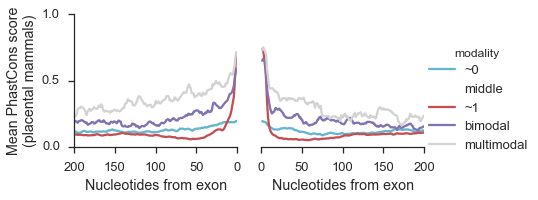

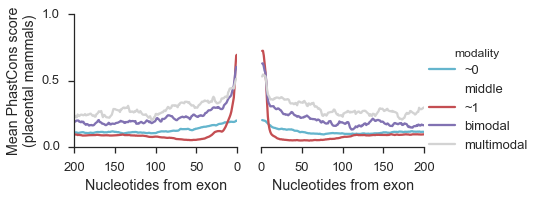

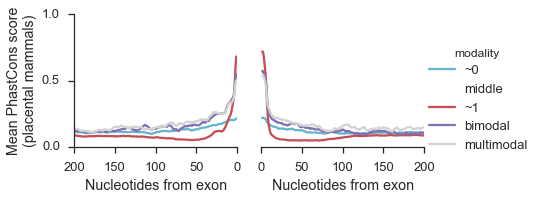

In [269]:
min_events_per_modality = 5

bed_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
intron_conservation_3p = pd.read_csv('{}/exon2_upstream200_placental_mammal_conservation.csv'.format(bed_folder), 
                                     index_col=0)
intron_conservation_5p = pd.read_csv('{}/exon2_downstream200_placental_mammal_conservation.csv'.format(bed_folder), 
                                     index_col=0)

intron_conservations = {'Upstream': intron_conservation_3p, 
                        'Downstream': intron_conservation_5p}

for phenotype, phenotype_df in study.supplemental.modalities_tidy.groupby('phenotype'):
    phenotype_df = phenotype_df.groupby('modality').filter(lambda x: len(x) >= min_events_per_modality)
    modalities = phenotype_df.set_index('event_name').modality
    modalities = modalities.drop(modalities.index.get_duplicates())
    
    
    dfs = []
    for intron_name, intron_conservation in intron_conservations.items():
        mean_conservation = intron_conservation.groupby(modalities).mean()
        mean_conservation.columns = mean_conservation.columns.astype(int) + 1
        mean_conservation.head()
        tidy = mean_conservation.unstack().reset_index()
        tidy = tidy.rename(columns={'level_0':'genome_direction_nt', 0: 'Conservation'})
        tidy['direction'] = intron_name
        dfs.append(tidy)
#         var_conservation = intron_conservation.groupby(modalities).var()
    modality_basewise_conservation = pd.concat(dfs, ignore_index=True)
    
    g = sns.FacetGrid(modality_basewise_conservation, hue='modality', hue_order=MODALITY_ORDER,
                     palette=MODALITY_PALETTE, 
                      col='direction', sharex=False,
                      col_order=['Upstream', 'Downstream'], size=3)
    g.map(plt.plot, 'genome_direction_nt', 'Conservation')
    for ax in g.axes.flat:
        ax.locator_params(nbins=4)
#         ax.locator_params('y', nbins=4)
        if ax.is_first_col():
            ax.set(ylabel='Mean PhastCons score\n(placental mammals)',
                   xticklabels=list(reversed([int(x) for x in ax.get_xticks()])))
        else:
            sns.despine(ax=ax, left=True)
            ax.yaxis.set_ticks_position('none')
    g.set(xlabel='Nucleotides from exon', title='', ylim=(0, 1))
    g.add_legend();
    g.savefig('{}/{}_intron_basewise_conservation.pdf'.format(folder, phenotype))

In [271]:
conservation_grouped = intron_conservation.groupby(modalities)
constitutive_conservation = conservation_grouped.get_group('~1')


In [274]:
from scipy.stats import mannwhitneyu

p_values = pd.DataFrame(index=MODALITY_ORDER, columns=constitutive_conservation.columns, dtype=float)
sign = pd.DataFrame(index=MODALITY_ORDER, columns=constitutive_conservation.columns, dtype=int)

for modality in MODALITY_ORDER:
    try:
        modality_conservation = conservation_grouped.get_group(modality)
    except KeyError:
        continue

    for position, values1 in modality_conservation.iteritems():
        values2 = constitutive_conservation[position]

        statistic, p_value = mannwhitneyu(values1, values2)

        # Get two-sided p-value
        p_value *= 2
        sign = np.sign(values2.mean() - values1.mean())
        p_values.loc[modality, position] = p_value
        signs.loc[modality, position] = -sign
p_values = p_values.dropna()
signs = signs.dropna()

[[]]

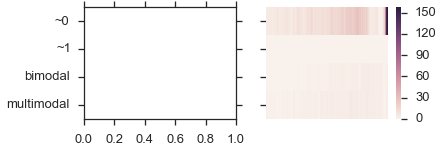

In [281]:
fig, axes = plt.subplots(ncols=2, figsize=(6, 2), sharey=True)

sns.heatmap(-np.log10(p_values), cbar_kws=dict(label=))
ax = plt.gca()
ax.set(xticks=[])